<a href="https://colab.research.google.com/github/EstevamHenrique/Portifolio1/blob/main/Predi%C3%A7%C3%A3o_Performance_de_Colaboradores_GB_HP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predição de Performance de Colaboradores**



# **Metodologia CRISP-DM**

### **CRISP-DM**, ou **Cross-Industry Standard Process for Data Mining**, é uma abordagem amplamente utilizada para guiar projetos de mineração de dados. Aqui está um resumo das etapas principais:

### **Entendimento do negócio:** Nesta fase inicial, os objetivos do projeto são definidos a partir da perspectiva dos negócios. Isso envolve compreender os requisitos, metas e recursos disponíveis.
### **Entendimento dos dados:** Os dados relevantes são coletados, explorados e inicialmente preparados para análise. Isso inclui a identificação de fontes de dados, a avaliação da qualidade dos dados e a seleção das variáveis mais pertinentes para o problema em questão.
###**Preparação dos dados**: Nesta etapa, os dados são limpos, transformados e integrados conforme necessário para a análise. Isso pode envolver a remoção de valores ausentes, a normalização de dados e a criação de variáveis derivadas.
###**Modelagem:** Aqui, diversas técnicas de modelagem são aplicadas aos dados preparados para desenvolver modelos que possam prever ou classificar padrões relevantes. Esta fase também inclui a seleção e ajuste dos modelos para otimizar seu desempenho.
###**Avaliação:** Os modelos criados são avaliados com base nos critérios estabelecidos durante o entendimento do negócio. Isso envolve a análise de métricas de desempenho, validação cruzada e, possivelmente, a realização de testes em conjuntos de dados de validação ou teste.
###**Implantação:** Uma vez que um modelo satisfatório tenha sido desenvolvido e avaliado, ele é implantado no ambiente de produção. Isso pode incluir a integração do modelo em sistemas existentes ou a implementação de soluções para uso prático.
###**Monitoramento:** Esta fase envolve o monitoramento contínuo do desempenho do modelo implantado no ambiente de produção. Isso permite identificar desvios de desempenho ao longo do tempo e tomar medidas corretivas, se necessário.
###Essas etapas não são necessariamente lineares e iterativas, e muitas vezes é necessário revisitar etapas anteriores conforme novos insights são descobertos ou novos requisitos surgem. O CRISP-DM fornece uma estrutura flexível e robusta para orientar o processo de mineração de dados em diversos contextos industriais.

# **ENTENDIMENTO DO NEGÓCIO**

## **Predição de Performance de Colaboradores**

### Uma empresa de Contact Center e Customer Experience contrata muitas pessoas por ano. Esse ramo de Contact Center é conhecido por ser a porta de entrada de muita gente no mercado, pois não exige muita experiência.
### No entanto, o turnover por baixo desempenho dos colaboradores também é muito alto, fazendo com que a empresa tenha que ficar contratando e treinando pessoas constantemente para que a operação de atendimento não fique sem colaboradores e o cliente final não sinta uma demora para ser atendimento nos mais diversos canais de atendimento, desde o telefone até o chat e whatsapp.
### A empresa gostaria de testar técnicas de People Analytics para ajudar o time de Atração de Talentos a filtrar melhor os perfis de colaboradores no processo seletivo a fim de trazer mais colaboradores com potencial de boa performance no trabalho. Para isso, os analistas de dados devem analisar um histórico de 7.240 colaboradores e sua performance após 6 meses a contração para responder:
### Com base nessas informações, pede-se:

## **1.Quais fatores o time de Atração de Talentos deve olhar para selecionar candidatos com maior chance de ter boa performance após 6 meses à data da contratação?**

## **2.Com base nisso, qual política de contratação deve passar a valer de forma que a empresa aumente as boas contratações?**



# **Instalando e Importando bibliotecas para o projeto**

In [ ]:
!pip install matplotlib
!pip install seaborn
!pip install pandas-profiling
!pip install dtreeviz
!pip install sweetviz
!pip install pydantic-settings
!pip install scikit-learn
!pip install ydata_profiling
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=9c53fb920434a0b8f1ea8dc1a8b2224ad677fad94ff8e6978055f1b67403982e
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1
     ━━━━━━━━━━━━━

## Importando Bibliotecas

In [ ]:
# Pacotes de preparação de dados
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

# Pacotes Gráficos
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import dtreeviz

#Pacotes de Modelagem
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from scipy.stats import ks_2samp
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# **importando Base de Dados**

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Cases/Predição_Performance_de_Colaboradores/base_atendimento.xlsx')
df.head(5)

# **Entendimento e Preparação dos Dados**

## **Tipos de Variáveis**




Esta é uma análise preliminar de um DataFrame com 7240 entradas e 14 colunas.
A maioria das variáveis parece ser categórica, representada como objetos, enquanto duas são numéricas (Id_Agente e Boa_Performance). As variáveis categóricas provavelmente precisarão ser codificadas de alguma forma para serem utilizadas em modelos de aprendizado de máquina, enquanto as variáveis numéricas podem ser utilizadas diretamente.

In [ ]:
df.info()

## **Missing Values**
### A base de dados não possui nenhuma informação faltante

In [ ]:
df.isnull().sum()

## **Duplicações**
### O banco de dados não possui duplicaçãos

In [ ]:
df.index.duplicated().sum()

# **Analise Exploratória**

## **Funções para Analises IV e Frequência**

### **Função para Analise IV (Information Values)**

In [ ]:
def gera_relatorios_aed(df, html_pp='base_aed_pp.html'):
    '''
    '''
    # Gera relatório usando ydata_profiling
    perfil_pp = ProfileReport(df, title="Profiling Report")
    perfil_pp.to_file(output_file=html_pp)

    return perfil_pp


class analise_iv:

    # função private
    def __get_tab_bivariada(self, var_escolhida):

        # Cria a contagem de Target_1 e Target_0
        df_aux = self.df.copy()
        df_aux['target2'] = self.df[self.target]
        df2 = df_aux.pivot_table(values='target2',
                                 index=var_escolhida,
                                 columns=self.target,
                                 aggfunc='count')

        df2 = df2.rename(columns={0:'#Target_0',
                                  1:'#Target_1'})
        df2.fillna(0, inplace=True)

        # Cria as demais colunas da tabela bivariada
        df2['Total'] = (df2['#Target_0'] + df2['#Target_1'])
        df2['%Freq'] = (df2['Total'] / (df2['Total'].sum()) * 100).round(decimals=4)
        df2['%Target_1'] = (df2['#Target_1'] / (df2['#Target_1'].sum()) * 100).round(decimals=4)
        df2['%Target_0'] = (df2['#Target_0'] / (df2['#Target_0'].sum()) * 100).round(decimals=4)
        df2['%Target_0'] = df2['%Target_0'].apply(lambda x: 0.01 if x == 0 else x) #corrige problema do log indeterminado
        df2['%Taxa_de_Target_1'] = (df2['#Target_1'] / df2['Total'] * 100).round(decimals=4)
        df2['Odds'] = (df2['%Target_1'] / df2['%Target_0']).round(decimals=4)
        df2['Odds'] = df2.Odds.apply(lambda x: 0.01 if x == 0 else x) #corrige problema do log indeterminado
        df2['LN(Odds)'] = np.log(df2['Odds']).round(decimals=4)
        df2['IV'] = (((df2['%Target_1'] / 100 - df2['%Target_0'] / 100) * df2['LN(Odds)'])).round(decimals=4)
        df2['IV'] = np.where(df2['Odds'] == 0.01, 0 , df2['IV'])

        df2 = df2.reset_index()
        df2['Variavel'] = var_escolhida
        df2 = df2.rename(columns={var_escolhida: 'Var_Range'})
        df2 = df2[['Variavel','Var_Range', '#Target_1','#Target_0', 'Total', '%Freq', '%Target_1', '%Target_0',
       '%Taxa_de_Target_1', 'Odds', 'LN(Odds)', 'IV']]

        # Guarda uma cópia da tabela no histórico
        self.df_tabs_iv = pd.concat([self.df_tabs_iv, df2], axis = 0)

        return df2

    def get_bivariada(self, var_escolhida='all_vars'):

        if var_escolhida == 'all_vars':

            #vars = self.df.drop(self.target,axis = 1).columns
            vars = self.get_lista_iv().index
            for var in vars:
                tabela = self.df_tabs_iv[self.df_tabs_iv['Variavel'] == var]
                print('==> "{}" tem IV de {}'.format(var,self.df_tabs_iv[self.df_tabs_iv['Variavel'] == var]['IV'].sum().round(decimals=4)))
                # printa a tabela no Jupyter
                display(tabela)

            return

        else:
            print('==> "{}" tem IV de {}'.format(var_escolhida,self.df_tabs_iv[self.df_tabs_iv['Variavel'] == var_escolhida]['IV'].sum().round(decimals=4)))
            return self.df_tabs_iv[self.df_tabs_iv['Variavel'] == var_escolhida]


    def get_lista_iv(self):


        # agrupa a lista de IV's em ordem descrescente
        lista = (self.df_tabs_iv.groupby('Variavel').agg({'IV':'sum'})).sort_values(by=['IV'],ascending=False)

        return lista



    def __init__(self, df, target, nbins=10):

        self.df = df.copy()
        self.target = target

        #lista de variaveis numericas
        df_num = self.df.loc[:,((self.df.dtypes == 'int32') |
                                (self.df.dtypes == 'int64') |
                                (self.df.dtypes == 'float64')
                               )
                            ]

        vars = df_num.drop(target,axis = 1).columns

        for var in vars:
            nome_var = 'fx_' + var
            df_num[nome_var] = pd.qcut(df_num[var],
                                       q=nbins,
                                       precision=2,
                                       duplicates='drop')
            df_num = df_num.drop(var, axis = 1)
            df_num = df_num.rename(columns={nome_var: var})

        #lista de variaveis qualitativas
        df_str = self.df.loc[:,((self.df.dtypes == 'object') |
                                (self.df.dtypes == 'category') |
                                (self.df.dtypes == 'bool'))]


        self.df = pd.concat([df_num,df_str],axis = 1)


         # inicializa tab historica
        self.df_tabs_iv = pd.DataFrame()

        vars = self.df.drop(self.target,axis = 1).columns
        for var in vars:
            self.__get_tab_bivariada(var);

        # remove tabs de iv duplicadas
        self.df_tabs_iv = self.df_tabs_iv.drop_duplicates(subset=['Variavel','Var_Range'], keep='last')


# Função para cálculo do KS
def ks_stat(y, y_pred):
    return ks_2samp(y_pred[y==1], y_pred[y!=1]).statistic

# Função para cálculo do desempenho de modelos
def calcula_desempenho(modelo, x_train, y_train, x_test, y_test):

    # Cálculo dos valores preditos
    ypred_train = modelo.predict(x_train)
    ypred_proba_train = modelo.predict_proba(x_train)[:,1]

    ypred_test = modelo.predict(x_test)
    ypred_proba_test = modelo.predict_proba(x_test)[:,1]

    # Métricas de Desempenho
    acc_train = accuracy_score(y_train, ypred_train)
    acc_test = accuracy_score(y_test, ypred_test)

    roc_train = roc_auc_score(y_train, ypred_proba_train)
    roc_test = roc_auc_score(y_test, ypred_proba_test)

    ks_train = ks_stat(y_train, ypred_proba_train)
    ks_test = ks_stat(y_test, ypred_proba_test)

    prec_train = precision_score(y_train, ypred_train, zero_division=0)
    prec_test = precision_score(y_test, ypred_test, zero_division=0)

    recl_train = recall_score(y_train, ypred_train)
    recl_test = recall_score(y_test, ypred_test)

    f1_train = f1_score(y_train, ypred_train)
    f1_test = f1_score(y_test, ypred_test)

    df_desemp = pd.DataFrame({'Treino':[acc_train, roc_train, ks_train,
                                        prec_train, recl_train, f1_train],
                              'Teste':[acc_test, roc_test, ks_test,
                                       prec_test, recl_test, f1_test]},
                            index=['Acurácia','AUROC','KS',
                                   'Precision','Recall','F1'])

    df_desemp['Variação'] = round(df_desemp['Teste'] / df_desemp['Treino'] - 1, 2)

    return df_desemp

### **Função Frequência Absoluta, Freqência Relativa e Frequência Acumulada**

In [ ]:
def frequencias(dados, variavel):
  """
  Função que calcula frequências absolutas, relativas e acumuladas, e cria um DataFrame.

  Argumentos:
    dados: Um DataFrame contendo os dados.
    variavel: Nome da coluna que contém os dados a serem analisados.

  Retorna:
    Um DataFrame com as seguintes colunas:
      * Classe: Intervalos da variável categorizada.
      * Frequência Absoluta: Número de ocorrências de cada categoria.
      * Frequência Relativa: Proporção de cada categoria em relação ao total.
      * Frequência Acumulada: Soma das frequências relativas até a categoria atual.
  """

  # Verifica se a variável existe no DataFrame
  if variavel not in dados.columns:
    raise ValueError(f"A coluna '{variavel}' não existe no DataFrame.")

  # Cria um DataFrame vazio para armazenar os resultados
  df_frequencias = pd.DataFrame(columns=['Classe', 'Frequência Absoluta', 'Frequência Relativa', 'Frequência Acumulada'])

  # Obtém a contagem de frequências absolutas
  contagem_absoluta = dados[variavel].value_counts()

  # Converte a contagem em um DataFrame com colunas 'Classe' e 'Frequência Absoluta'
  df_contagem_absoluta = contagem_absoluta.to_frame().reset_index()
  df_contagem_absoluta.columns = ['Classe', 'Frequência Absoluta']

  # Calcula a frequência relativa
  df_contagem_absoluta['Frequência Relativa'] = df_contagem_absoluta['Frequência Absoluta'] / dados.shape[0]

  # Calcula a frequência acumulada
  df_contagem_absoluta['Frequência Acumulada'] = df_contagem_absoluta['Frequência Relativa'].cumsum()

  # Combina os DataFrames (concatenação)
  df_frequencias = pd.concat([df_frequencias, df_contagem_absoluta], ignore_index=True)

  # Renomeia a coluna 'Classe' para o nome da variável original
  df_frequencias.rename(columns={'Classe': variavel}, inplace=True)

  # Retorna o DataFrame com as frequências
  return df_frequencias

  # Exemplo de uso
#dados = pd.DataFrame({
  #'Idade': [25, 30, 22, 27, 28, 33, 25],
  #'Sexo': ['M', 'F', 'M', 'F', 'M', 'F', 'M'],
  #'Cidade': ['São Paulo', 'Rio de Janeiro', 'São Paulo', 'Rio de Janeiro', 'São Paulo', 'Rio de Janeiro', 'São Paulo']
#})

#df_frequencias_idade = frequencias(dados, 'Idade')
#print(df_frequencias_idade)

### **Função Gráfico de pareto**

In [ ]:
import matplotlib.pyplot as plt

def plotar_grafico_pareto(df, indice_classe, indice_frequencia_absoluta, indice_frequencia_relativa_acumulada):
    """
    Função para plotar o gráfico de Pareto a partir de um DataFrame e índices de colunas específicos.

    Argumentos:
      df: Um DataFrame contendo os dados.
      indice_classe: Índice da coluna que contém os dados da classe (por exemplo, 0).
      indice_frequencia_absoluta: Índice da coluna que contém os dados da frequência absoluta (por exemplo, 1).
      indice_frequencia_relativa_acumulada: Índice da coluna que contém os dados da frequência relativa acumulada (por exemplo, 3).

    Observações:
      * O DataFrame deve estar ordenado por ordem decrescente de frequência absoluta.
    """

    # Ordena o DataFrame por frequência absoluta
    df = df.sort_values(by=df.columns[indice_frequencia_absoluta], ascending=False)

    # Extrai os dados das colunas especificadas pelos índices
    classe = df.iloc[:, indice_classe].to_numpy()
    frequencia_absoluta = df.iloc[:, indice_frequencia_absoluta].to_numpy()
    frequencia_relativa_acumulada = df.iloc[:, indice_frequencia_relativa_acumulada].to_numpy()

    # Define a figura e os eixos para o gráfico
    fig, ax1 = plt.subplots(figsize=(12, 8))  # Aumentando o tamanho do gráfico

    # Plota as barras de frequência absoluta
    barras = ax1.bar(classe, frequencia_absoluta, color='b', alpha=0.7, label='Frequência Absoluta', width=0.8)  # Aumentando a largura das barras

    # Adiciona legendas nas barras com a frequência absoluta
    for barra in barras:
        altura = barra.get_height()
        ax1.annotate('{:.2f}'.format(altura),  # Formatando para duas casas decimais
                    xy=(barra.get_x() + barra.get_width() / 2, altura),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    # Define o eixo y da esquerda para a frequência relativa
    ax1.set_ylabel("Frequência Relativa", color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Cria um segundo eixo y para a frequência acumulada
    ax2 = ax1.twinx()
    ax2.plot(classe, frequencia_relativa_acumulada, color='green', marker='o', label='Frequência Relativa Acumulada')
    ax2.set_ylabel("Frequência Acumulada", color='tab:green')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    # Plota a linha de referência de 80%
    ax2.axhline(y=0.8 * frequencia_absoluta.sum(), color='red', linestyle='--', label='80%')

    # Define os rótulos e títulos dos eixos
    ax1.set_xlabel(f"Coluna {indice_classe}")
    ax1.set_title('Gráfico de Pareto')

    # Rotaciona os rótulos do eixo x para melhor visualização
    ax1.set_xticklabels(classe, rotation=45, ha='right')

    # Adiciona legendas
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Mostra o gráfico
    plt.show()

# Exemplo de uso (com o DataFrame e os índices das colunas)
# plotar_grafico_pareto(df_frequencias_idade, 0, 1, 3)  # Assumindo que os índices estão corretos


## **Variável "Target" Boa_Performance**


In [ ]:
#Cria um data frame da coluna 'Target' boa_performance com a frequência absoluta, relativa e acumulada.
df_boa_performance = frequencias(df, "Boa_Performance")
df_boa_performance.head()

In [ ]:
# Define os dados para o gráfico de barras
labels = ['Sim', 'Não']
values = [df_boa_performance['Frequência Absoluta'][0], df_boa_performance['Frequência Absoluta'][1]]

# Cria o gráfico de barras
plt.bar(labels, values, color=['blue', 'green'])

# Adiciona título e rótulos dos eixos
plt.title('Gráfico de Barras - Boa_Performance')
plt.xlabel('Target')
plt.ylabel('Quantidade')

# Adiciona valores acima das barras
for i, value in enumerate(values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Mostra o gráfico
plt.show()


In [ ]:
df_iv = analise_iv(df, 'Boa_Performance')
df_iv.get_lista_iv()

In [ ]:
gera_relatorios_aed(df)

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import sweetviz as sv

In [ ]:
report = sv.analyze(df, target_feat='Boa_Performance')

# Abre o relatório no navegador
report.show_html('Sweetviz_Report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Sweetviz_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### **Insights "Target" Boa_Performance**

**Frequências**

Notavelmente, cerca de 56.48% dos agentes tiveram uma boa performance, enquanto os outros 43.52% não tiveram.

**Análise Information Value(IV)**

1. P 02 - Qual área de atendimento você atua ou atuou por mais tempo? (IV: 0.0334).: Essa variável tem o IV mais alto, sugerindo que a área de atendimento em que os funcionários atuaram por mais tempo pode ser um indicador significativo de seu desempenho ou comportamento.
2. P 07 - É bom trabalhar com meus colegas de trabalho. (IV: 0.0263): Esta variável também tem um IV relativamente alto, indicando que a percepção sobre o ambiente de trabalho e relacionamento com os colegas pode ter uma influência considerável na performance.
3. P 01 - Antes de trabalhar na empresa, você tinha experiência em Contact Center? (IV: 0.0252): A experiência prévia em centrais de contato também é considerada importante, sugerindo que essa experiência pode influenciar o desempenho ou adaptação dos funcionários na empresa.
4. P 06 - Você possui dependentes? (IV: 0.0226): A presença de dependentes também é uma variável com um IV significativo, o que indica que o estado de ter dependentes pode afetar o desempenho ou comportamento dos funcionários.

Esses são os principais insights com base nos valores de IV fornecidos. Variáveis com IV mais alto geralmente são consideradas mais importantes na modelagem preditiva ou na análise de associação com o resultado desejado.

## **P 01: Antes de trabalhar na empresa, você tinha experiência em Contact Center?**


Essa pergunta busca determinar se os respondentes possuíam experiência prévia em centrais de contato antes de ingressarem na empresa em questão. Essa informação é relevante para entender o histórico de trabalho dos funcionários e pode influenciar o treinamento necessário, as expectativas de desempenho e a adaptação ao ambiente de trabalho atual.

In [ ]:
#Cria um data frame da coluna "P 01: Antes de trabalhar na empresa, você tinha experiência em Contact Center?"com a frequência absoluta, relativa e acumulada.
df_p01 = frequencias(df, 'P 01: Antes de trabalhar na empresa, você tinha experiência em Contact Center?')
df_p01.head()

,"P 01: Antes de trabalhar na empresa, você tinha experiência em Contact Center?",Frequência Absoluta,Frequência Relativa,Frequência Acumulada
0,Sim,3651,0.504282,0.504282
1,Não,2380,0.328729,0.833011
2,A empresa é o meu primeiro emprego,1038,0.143370,0.976381
3,Sem resposta,171,0.023619,1.000000


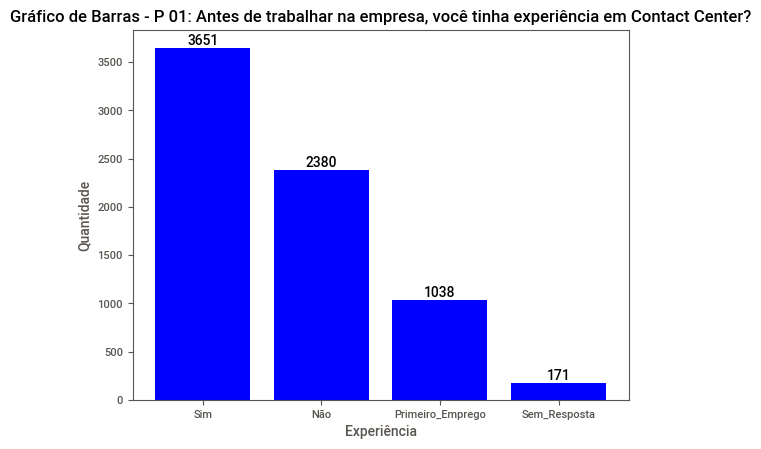

In [ ]:
# Define os dados para o gráfico de barras
labels = ['Sim', 'Não', 'Primeiro_Emprego', 'Sem_Resposta']
values = [df_p01['Frequência Absoluta'][0], df_p01['Frequência Absoluta'][1], df_p01['Frequência Absoluta'][2], df_p01['Frequência Absoluta'][3]]

# Cria o gráfico de barras
plt.bar(labels, values, color=['blue', 'blue', 'blue', 'blue'])

# Adiciona título e rótulos dos eixos
plt.title('Gráfico de Barras - P 01: Antes de trabalhar na empresa, você tinha experiência em Contact Center?')
plt.xlabel('Experiência')
plt.ylabel('Quantidade')

# Adiciona valores acima das barras
for i, value in enumerate(values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Mostra o gráfico
plt.show()


<ipython-input-9-7aa3975950aa>:58: UserWarning: FixedFormatter should only be used together with FixedLocator


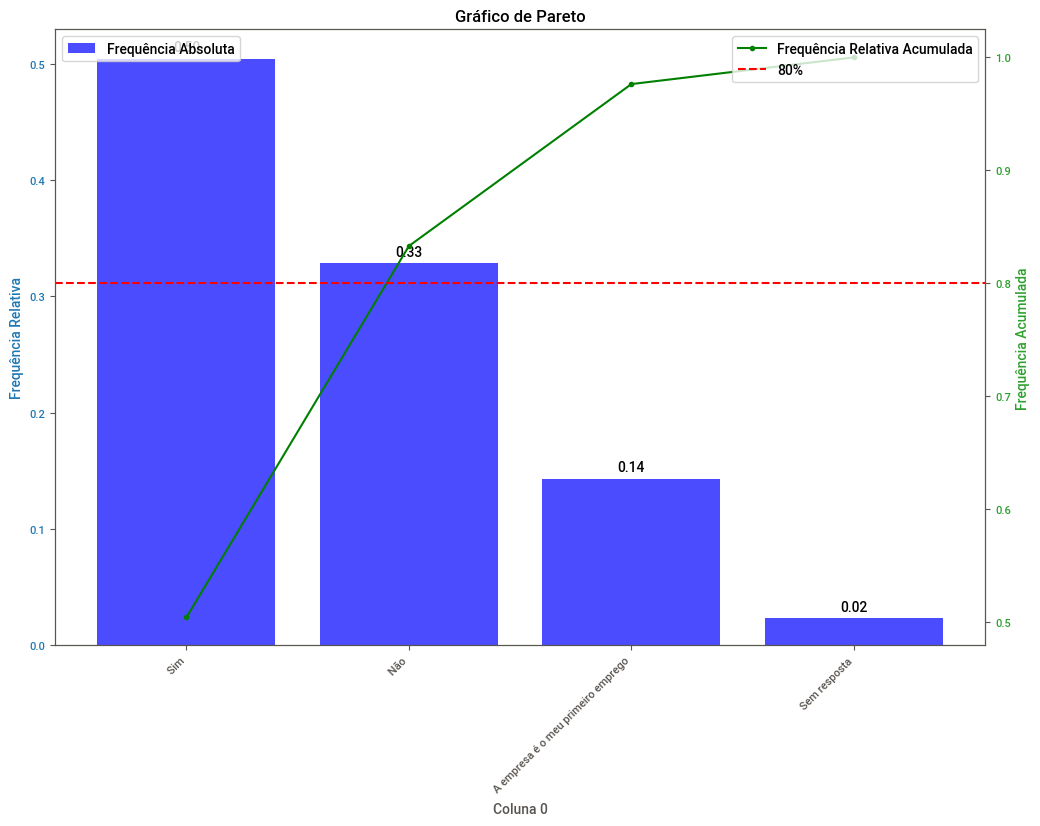

In [ ]:
plotar_grafico_pareto(df_p01, 0, 2, 3)

In [ ]:
df_iv.get_bivariada(var_escolhida= 'P 01: Antes de trabalhar na empresa, você tinha experiência em Contact Center?')

==> "P 01: Antes de trabalhar na empresa, você tinha experiência em Contact Center?" tem IV de 0.0252


Boa_Performance,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,"P 01: Antes de trabalhar na empresa, você tinh...",A empresa é o meu primeiro emprego,664,374,1038,14.3370,16.2387,11.8692,63.9692,1.3681,0.3134,0.0137
1,"P 01: Antes de trabalhar na empresa, você tinh...",Não,1389,991,2380,32.8729,33.9692,31.4503,58.3613,1.0801,0.0771,0.0019
2,"P 01: Antes de trabalhar na empresa, você tinh...",Sem resposta,98,73,171,2.3619,2.3967,2.3167,57.3099,1.0345,0.0339,0.0000
3,"P 01: Antes de trabalhar na empresa, você tinh...",Sim,1938,1713,3651,50.4282,47.3955,54.3637,53.0813,0.8718,-0.1372,0.0096


### **Insights P01: Antes de trabalhar na empresa, você tinha experiência em Contact Center?**



**Experiência em Contact Center:**
1. A maioria dos colaboradores (aproximadamente 50.43%) tinha experiência em Contact Center antes de ingressar na empresa.*
2. Cerca de 32.87% dos colaboradores não tinham experiência prévia em Contact Center antes de ingressar na empresa.
3. Uma parcela menor (aproximadamente 14.34%) indicou que a empresa é o seu primeiro emprego.
4. Uma pequena porcentagem (aproximadamente 2.36%) não respondeu a essa pergunta.
**Frequência Acumulada:**
1. Cerca de 83.30% dos colaboradores tinham alguma forma de experiência anterior antes de ingressar na empresa.
2. A grande maioria dos colaboradores (aproximadamente 97.64%) tinha alguma forma de experiência anterior ou indicou que a empresa é o seu primeiro emprego.
3. Todos os colaboradores forneceram resposta para essa pergunta, pois a frequência acumulada é de 100%.
**Implicações para o Recrutamento:**
1. Aqueles com experiência anterior em Contact Center podem trazer habilidades e conhecimentos prévios que podem ser benéficos para a função.
2. Colaboradores que indicaram que a empresa é o seu primeiro emprego podem precisar de mais suporte e treinamento inicial para se adaptarem ao ambiente de Contact Center.
3. É importante considerar a experiência prévia dos candidatos durante o processo de recrutamento e seleção, buscando equilibrar a diversidade de experiências com as necessidades específicas do cargo e da empresa.

Esses insights podem ser úteis para o desenvolvimento de estratégias de recrutamento mais eficazes e para a identificação de áreas de melhoria no processo de integração e treinamento dos novos colaboradores.

**Análie Information Value (IV) P01**
* A empresa é o meu primeiro emprego: IV = 0.01
* Não: IV = 0.00
* Sem resposta: IV = 0.00
* Sim: IV = 0.01

O Information Value (IV) é uma medida da importância de uma variável na previsão da variável alvo. Geralmente, um IV maior indica uma variável mais informativa. Neste caso, todas as categorias da variável "P 01" têm um IV muito baixo, indicando que essa variável pode não ser muito útil por si só para prever a boa performance dos colaboradores.

Isso sugere que, isoladamente, a variável "P 01" pode não ser muito útil para prever a boa performance dos colaboradores. No entanto, combinada com outras variáveis ou em conjunto com outras análises, ela ainda pode fornecer insights valiosos para o processo de recrutamento e seleção.

## **P 02: Qual área de atendimento você atua ou atuou por mais tempo?**


Essa pergunta busca identificar a área de atuação principal dos respondentes ao longo de suas carreiras ou experiências profissionais. Ela fornece insights sobre a especialização e experiência dos indivíduos em diferentes campos de trabalho, o que pode ser útil para entender suas habilidades, interesses e trajetórias profissionais.

In [ ]:
#Cria um data frame da coluna "P 02: Qual área de atendimento você atua ou atuou por mais tempo?"com a frequência absoluta, relativa e acumulada.

df_p02 = frequencias(df, 'P 02: Qual área de atendimento você atua ou atuou por mais tempo?')
df_p02.head(20)

,P 02: Qual área de atendimento você atua ou atuou por mais tempo?,Frequência Absoluta,Frequência Relativa,Frequência Acumulada
0,Sem resposta,3613,0.499033,0.499033
1,Atendimento Receptivo,1487,0.205387,0.704420
2,Backoffice,473,0.065331,0.769751
3,Ativo de Vendas,353,0.048757,0.818508
4,Cobrança,320,0.044199,0.862707
5,Suporte Técnico,288,0.039779,0.902486
6,Chat ou email,265,0.036602,0.939088
7,Multiskill,226,0.031215,0.970304
8,Retenção,99,0.013674,0.983978
9,Receptivo de Vendas,90,0.012431,0.996409


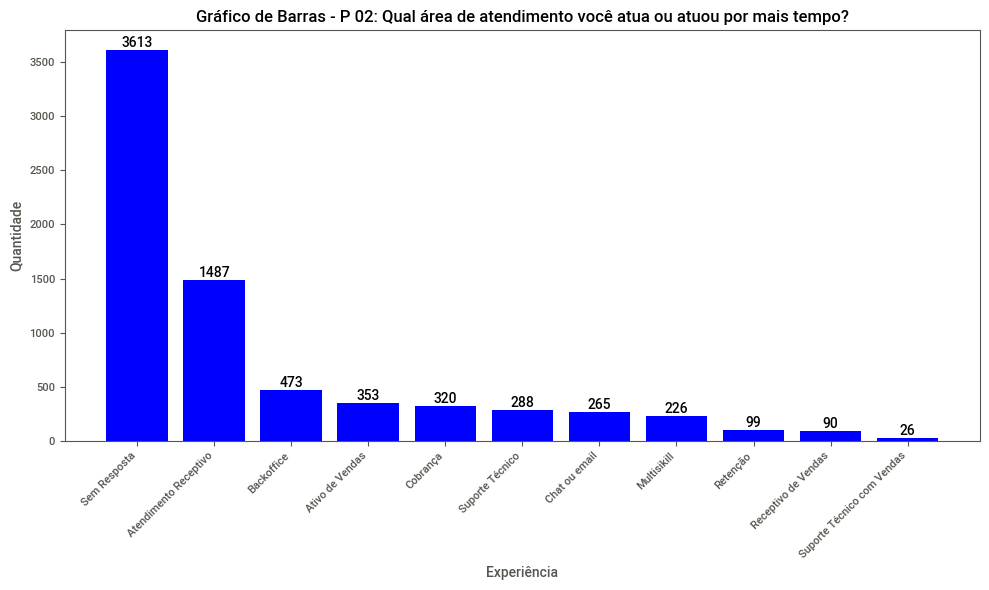

In [ ]:
# Define os dados para o gráfico de barras
labels = ['Sem Resposta', 'Atendimento Receptivo', 'Backoffice', 'Ativo de Vendas', 'Cobrança', 'Suporte Técnico', 'Chat ou email', 'Multisikill', 'Retenção', 'Receptivo de Vendas', 'Suporte Técnico com Vendas']
values = [df_p02['Frequência Absoluta'][0], df_p02['Frequência Absoluta'][1], df_p02['Frequência Absoluta'][2], df_p02['Frequência Absoluta'][3], df_p02['Frequência Absoluta'][4], df_p02['Frequência Absoluta'][5], df_p02['Frequência Absoluta'][6]
          , df_p02['Frequência Absoluta'][7], df_p02['Frequência Absoluta'][8], df_p02['Frequência Absoluta'][9], df_p02['Frequência Absoluta'][10]]

# Cria a figura e os eixos
plt.figure(figsize=(10, 6))

# Cria o gráfico de barras
plt.bar(labels, values, color='blue')

# Adiciona título e rótulos dos eixos
plt.title('Gráfico de Barras - P 02: Qual área de atendimento você atua ou atuou por mais tempo?')
plt.xlabel('Experiência')
plt.ylabel('Quantidade')

# Rotaciona os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

# Adiciona valores acima das barras
for i, value in enumerate(values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Mostra o gráfico
plt.tight_layout()
plt.show()


<ipython-input-9-7aa3975950aa>:58: UserWarning: FixedFormatter should only be used together with FixedLocator


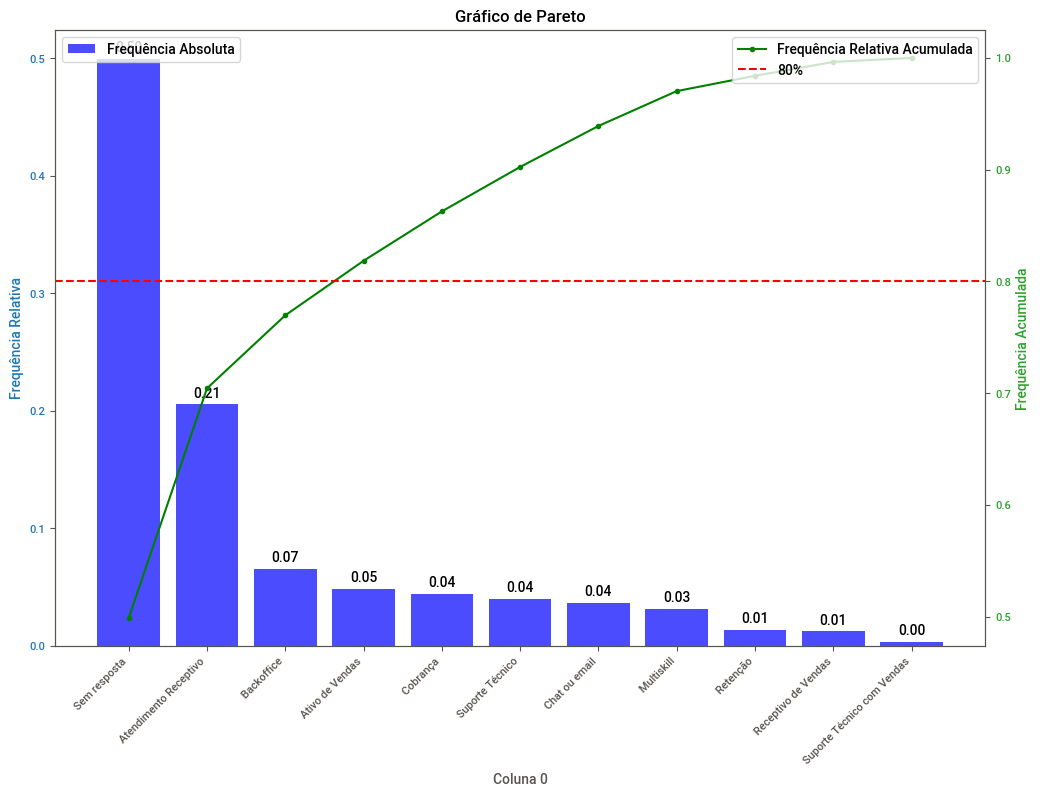

In [ ]:
#Grafico de Pareto
plotar_grafico_pareto(df_p02, 0, 2, 3)

In [ ]:
#Análise IV
df_iv.get_bivariada('P 02: Qual área de atendimento você atua ou atuou por mais tempo?')

==> "P 02: Qual área de atendimento você atua ou atuou por mais tempo?" tem IV de 0.0334


Boa_Performance,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,P 02: Qual área de atendimento você atua ou at...,Atendimento Receptivo,770,717,1487,20.5387,18.8310,22.7547,51.7821,0.8276,-0.1892,0.0074
1,P 02: Qual área de atendimento você atua ou at...,Ativo de Vendas,192,161,353,4.8757,4.6955,5.1095,54.3909,0.9190,-0.0845,0.0003
2,P 02: Qual área de atendimento você atua ou at...,Backoffice,284,189,473,6.5331,6.9455,5.9981,60.0423,1.1580,0.1467,0.0014
3,P 02: Qual área de atendimento você atua ou at...,Chat ou email,148,117,265,3.6602,3.6195,3.7131,55.8491,0.9748,-0.0255,0.0000
4,P 02: Qual área de atendimento você atua ou at...,Cobrança,167,153,320,4.4199,4.0841,4.8556,52.1875,0.8411,-0.1730,0.0013
5,P 02: Qual área de atendimento você atua ou at...,Multiskill,124,102,226,3.1215,3.0325,3.2371,54.8673,0.9368,-0.0653,0.0001
6,P 02: Qual área de atendimento você atua ou at...,Receptivo de Vendas,47,43,90,1.2431,1.1494,1.3646,52.2222,0.8423,-0.1716,0.0004
7,P 02: Qual área de atendimento você atua ou at...,Retenção,39,60,99,1.3674,0.9538,1.9042,39.3939,0.5009,-0.6913,0.0066
8,P 02: Qual área de atendimento você atua ou at...,Sem resposta,2161,1452,3613,49.9033,52.8491,46.0806,59.8118,1.1469,0.1371,0.0093
9,P 02: Qual área de atendimento você atua ou at...,Suporte Técnico,138,150,288,3.9779,3.3749,4.7604,47.9167,0.7090,-0.3439,0.0048


### **Insigths**

**Frequências:**

1. Distribuição da Área de Atendimento:
* A maioria dos colaboradores (aproximadamente 49.90%) não forneceu uma resposta específica sobre a área de atendimento em que atuaram por mais tempo.
* Entre os colaboradores que forneceram uma resposta específica, a distribuição é a seguinte:
        * Atendimento Receptivo: 20.54%
        * Backoffice: 6.53%
        * Ativo de Vendas: 4.88%
        * Cobrança: 4.42%
        * Suporte Técnico: 3.98%
        * Chat ou email: 3.66%
        * Multiskill: 3.12%
        * Retenção: 1.37%
        * Receptivo de Vendas: 1.24%
        * Suporte Técnico com Vendas: 0.36%
2. Frequência Acumulada:
* Cerca de 70.44% dos colaboradores forneceram uma resposta específica sobre a área de atendimento em que atuaram por mais tempo.
* A maioria dos colaboradores que forneceu uma resposta específica está distribuída entre as categorias de Atendimento Receptivo, Backoffice, Ativo de Vendas, Cobrança, Suporte Técnico e Chat ou email.

Essa análise fornece insights sobre a distribuição da área de atendimento entre os colaboradores e pode ser útil para entender as experiências e habilidades dos colaboradores em diferentes contextos de atendimento. Essa compreensão pode informar o desenvolvimento de estratégias de recrutamento, treinamento e alocação de recursos dentro da empresa.

**Análise Information Value (IV)**

* Atendimento Receptivo: IV = 0.01
* Ativo de Vendas: IV = 0.00
* Backoffice: IV = 0.00
* Chat ou email: IV = 0.00
* Cobrança: IV = 0.00
* Multiskill: IV = 0.00
* Receptivo de Vendas: IV = 0.00
* Retenção: IV = 0.01
* Sem resposta: IV = 0.01
* Suporte Técnico: IV = 0.00
* Suporte Técnico com Vendas: IV = 0.00

Com base nos valores de IV fornecidos, podemos observar que as categorias "Atendimento Receptivo", "Retenção" e "Sem resposta" têm um IV um pouco mais alto, indicando que essas categorias podem ser mais úteis na previsão da boa performance dos colaboradores em comparação com outras categorias.

No entanto, é importante considerar que as categorias com IV mais baixos ainda podem fornecer informações úteis quando combinadas com outras variáveis ou em análises mais avançadas.

## **P 03: Qual a sua escolaridade?**


Essa pergunta busca informações sobre o nível educacional dos respondentes. Ela fornece insights importantes sobre o grau de formação acadêmica dos indivíduos, o que pode ser muito relevante.

In [ ]:
#Cria um data frame da coluna "P 03: Qual a sua escolaridade?"com a frequência absoluta, relativa e acumulada.
df_p03 = frequencias(df, 'P 03: Qual a sua escolaridade?')
df_p03

,P 03: Qual a sua escolaridade?,Frequência Absoluta,Frequência Relativa,Frequência Acumulada
0,Ensino Médio completo,2880,0.397790,0.397790
1,Ensino Superior cursando,1799,0.248481,0.646271
2,Ensino Superior concluído,1237,0.170856,0.817127
3,Ensino Superior incompleto,966,0.133425,0.950552
4,Pós Graduação cursando,137,0.018923,0.969475
5,Pós Graduação concluído,129,0.017818,0.987293
6,Sem resposta,92,0.012707,1.000000


<ipython-input-25-cdfee34554f6>:26: UserWarning: Glyph 9 (	) missing from current font.
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.


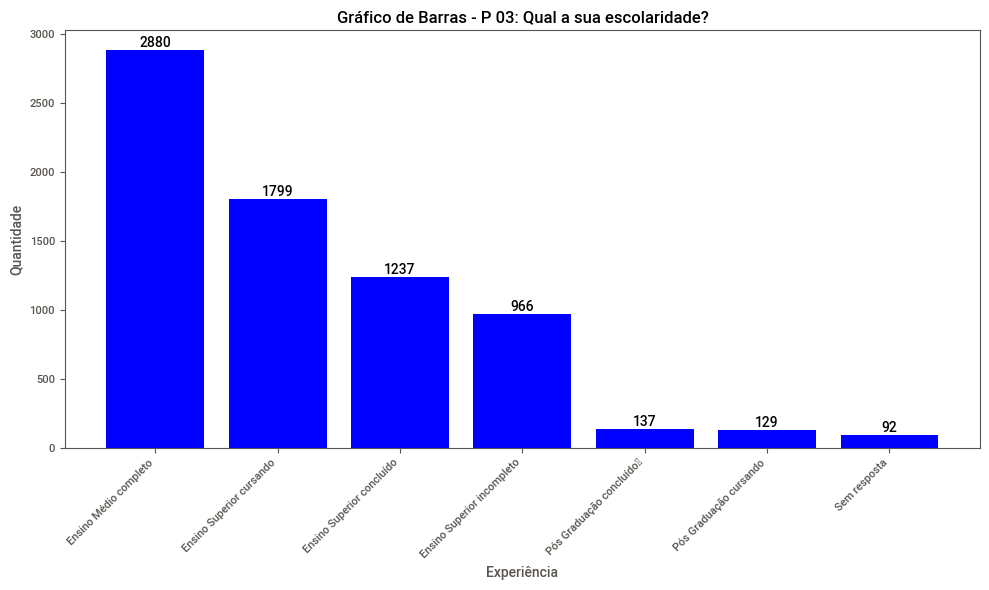

In [ ]:
# Define os dados para o gráfico de barras
labels = ['Ensino Médio completo', 'Ensino Superior cursando', 'Ensino Superior concluído', 'Ensino Superior incompleto', 'Pós Graduação concluído	', 'Pós Graduação cursando', 'Sem resposta',]
values = [df_p03['Frequência Absoluta'][0], df_p03['Frequência Absoluta'][1], df_p03['Frequência Absoluta'][2], df_p03['Frequência Absoluta'][3],
          df_p03['Frequência Absoluta'][4], df_p03['Frequência Absoluta'][5], df_p03['Frequência Absoluta'][6]
]

# Cria a figura e os eixos
plt.figure(figsize=(10, 6))

# Cria o gráfico de barras
plt.bar(labels, values, color='blue')

# Adiciona título e rótulos dos eixos
plt.title('Gráfico de Barras - P 03: Qual a sua escolaridade?')
plt.xlabel('Experiência')
plt.ylabel('Quantidade')

# Rotaciona os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

# Adiciona valores acima das barras
for i, value in enumerate(values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Mostra o gráfico
plt.tight_layout()
plt.show()

<ipython-input-9-7aa3975950aa>:58: UserWarning: FixedFormatter should only be used together with FixedLocator


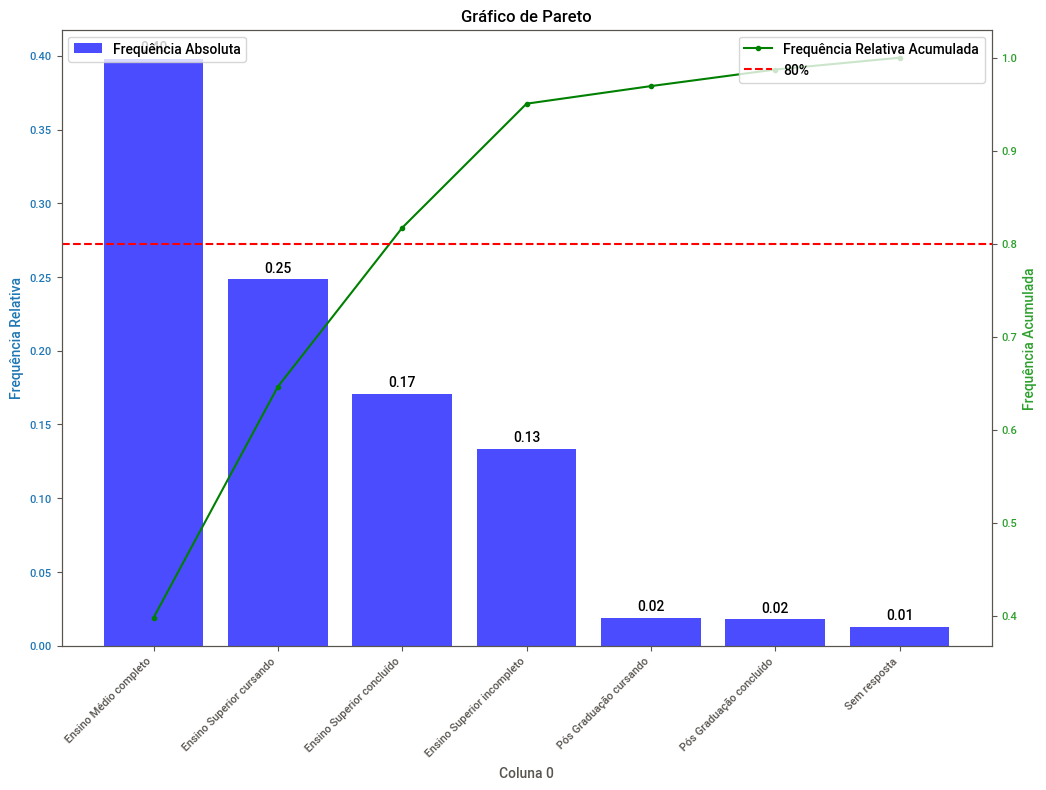

In [ ]:
#Gráfico de Pareto
plotar_grafico_pareto(df_p03, 0, 2,3)

In [ ]:
#Análise IV
df_iv.get_bivariada('P 03: Qual a sua escolaridade?')

==> "P 03: Qual a sua escolaridade?" tem IV de 0.0152


Boa_Performance,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,P 03: Qual a sua escolaridade?,Ensino Médio completo,1566,1314,2880,39.7790,38.2979,41.7010,54.3750,0.9184,-0.0851,0.0029
1,P 03: Qual a sua escolaridade?,Ensino Superior concluído,766,471,1237,17.0856,18.7332,14.9476,61.9240,1.2533,0.2258,0.0085
2,P 03: Qual a sua escolaridade?,Ensino Superior cursando,1004,795,1799,24.8481,24.5537,25.2301,55.8088,0.9732,-0.0272,0.0002
3,P 03: Qual a sua escolaridade?,Ensino Superior incompleto,530,436,966,13.3425,12.9616,13.8369,54.8654,0.9367,-0.0654,0.0006
4,P 03: Qual a sua escolaridade?,Pós Graduação concluído,81,48,129,1.7818,1.9809,1.5233,62.7907,1.3004,0.2627,0.0012
5,P 03: Qual a sua escolaridade?,Pós Graduação cursando,87,50,137,1.8923,2.1277,1.5868,63.5036,1.3409,0.2933,0.0016
6,P 03: Qual a sua escolaridade?,Sem resposta,55,37,92,1.2707,1.3451,1.1742,59.7826,1.1455,0.1358,0.0002


### **Insights P 03: Qual a sua escolaridade?**

**Frequências**
* Ensino Médio Completo: Com uma frequência absoluta de 2880, esta categoria é a mais frequente entre as opções de escolaridade fornecidas. Representa cerca de 39.78% do total de observações. Isso significa que uma parcela significativa da amostra possui Ensino Médio Completo.
* Ensino Superior Cursando: Com 1799 observações, esta categoria tem uma frequência relativa de aproximadamente 24.85%. Embora seja a segunda mais frequente, ainda representa uma proporção substancial dos respondentes.
* Ensino Superior Concluído: Com 1237 observações, esta categoria representa cerca de 17.09% do total. Embora menos frequente do que "Ensino Superior Cursando", ainda é uma proporção significativa da amostra.
* Ensino Superior Incompleto: Esta categoria tem 966 observações, representando aproximadamente 13.34% do total. Embora menos frequente que as categorias anteriores, ainda é uma proporção considerável da amostra.
* Pós-Graduação Cursando: Com 137 observações, representa cerca de 1.89% do total. É uma categoria menos frequente em comparação com as anteriores, indicando que menos respondentes estão cursando Pós-Graduação.
* Pós-Graduação Concluída: Com 129 observações, representa aproximadamente 1.78% do total. Similar à categoria anterior, indica que uma pequena proporção da amostra concluiu a Pós-Graduação.
* Sem Resposta: Com 92 observações, representa cerca de 1.27% do total. Esta categoria inclui respondentes que não forneceram informações sobre sua escolaridade. Embora menos frequente que as categorias anteriores, ainda é importante considerar esses casos na análise.

**ODDS**

* Ensino Médio Completo: As odds são 0.92, o que significa que a chance de ter uma boa performance (Target_1) para indivíduos com Ensino Médio Completo é cerca de 0.92 vezes a chance de não ter boa performance (Target_0). Isso indica que, em média, indivíduos com Ensino Médio Completo têm uma probabilidade ligeiramente menor de ter boa performance em comparação com não ter boa performance.
* Ensino Superior Concluído: As odds são 1.25, indicando que a chance de ter uma boa performance para aqueles com Ensino Superior Concluído é 1.25 vezes maior do que a chance de não ter boa performance. Isso sugere que a conclusão do Ensino Superior está associada a uma maior probabilidade de boa performance.
Ensino Superior Cursando: As odds são 0.97, sugerindo que a chance de ter uma boa performance para aqueles que estão cursando Ensino Superior é praticamente igual à chance de não ter boa performance. Isso indica que cursar o Ensino Superior ainda não parece ter um impacto significativo na probabilidade de boa performance.
* Ensino Superior Incompleto: As odds são 0.94, indicando que a chance de ter uma boa performance para aqueles com Ensino Superior Incompleto é ligeiramente menor do que a chance de não ter boa performance. Isso sugere que a falta de conclusão do Ensino Superior pode estar associada a uma probabilidade ligeiramente menor de boa performance.
Pós-Graduação Concluída: As odds são 1.30, indicando que a chance de ter uma boa performance para aqueles com Pós-Graduação Concluída é consideravelmente maior do que a chance de não ter boa performance. Isso sugere que a conclusão da Pós-Graduação está fortemente associada a uma maior probabilidade de boa performance.
* Pós-Graduação Cursando: As odds são 1.34, sugerindo que a chance de ter uma boa performance para aqueles que estão cursando Pós-Graduação é ainda maior do que para aqueles com Pós-Graduação Concluída. Isso indica que a simples participação em um programa de Pós-Graduação já pode ser indicativo de uma maior probabilidade de boa performance.
* Sem Resposta: As odds são 1.15, indicando que a chance de ter uma boa performance para aqueles que não responderam a pergunta sobre escolaridade é ligeiramente maior do que a chance de não ter boa performance. Isso pode indicar que o fato de não responder pode estar associado a uma probabilidade ligeiramente maior de boa performance, embora a razão por trás disso não esteja clara sem mais contexto.

**Information Value(IV)**

* Ensino Médio Completo: O IV para esta categoria é 0.00, o que significa que a escolaridade "Ensino Médio Completo" não contribui significativamente para a previsão da variável de destino "Boa Performance". Isso pode indicar que a escolaridade por si só não é um preditor forte de boa performance.
* Ensino Superior Concluído: O IV é 0.01 para esta categoria, indicando uma contribuição ligeiramente mais forte para a previsão de "Boa Performance" em comparação com "Ensino Médio Completo". Isso sugere que a conclusão do Ensino Superior pode estar um pouco mais associada à boa performance do que o Ensino Médio Completo.
* Ensino Superior Cursando: O IV é 0.00 para esta categoria, o que indica que a escolaridade "Ensino Superior Cursando" não contribui significativamente para a previsão da variável de destino. Isso sugere que o fato de estar cursando o Ensino Superior pode não ser um indicador forte de boa performance.
* Ensino Superior Incompleto: O IV é 0.00 para esta categoria, semelhante à categoria de "Ensino Superior Cursando", indicando que a escolaridade "Ensino Superior Incompleto" também não contribui significativamente para a previsão de "Boa Performance".
* Pós Graduação Concluída: O IV é 0.00 para esta categoria, sugerindo que a conclusão da Pós-Graduação não contribui significativamente para a previsão de "Boa Performance".
* Pós Graduação Cursando: O IV também é 0.00 para esta categoria, indicando que a escolaridade "Pós Graduação Cursando" não contribui significativamente para a previsão de "Boa Performance".
* Sem Resposta: O IV é 0.00 para esta categoria, o que significa que o fato de não fornecer uma resposta para a pergunta sobre escolaridade não contribui significativamente para a previsão de "Boa Performance".

In [ ]:
df.columns

Index(['Id_Agente', 'Boa_Performance',
       'P 01: Antes de trabalhar na empresa, você tinha experiência em Contact Center?',
       'P 02: Qual área de atendimento você atua ou atuou por mais tempo?',
       'P 03: Qual a sua escolaridade?',
       'P 04: Qual seu conhecimento em inglês?',
       'P 05: Qual o tempo gasto no trajeto da sua residência até a empresa?',
       'P 06: Você possui dependentes?',
       'P 07: É bom trabalhar com meus colegas de trabalho.',
       'P 08: Não tenho medo de criticar pessoas em cargos de liderança.',
       'P 09: Fico tenso quando estou trabalhando.',
       'P 10: Não gosto de situações que requerem que eu me comporte de forma controlada.',
       'P 11: Gosto de dizer o que penso.',
       'P 12: Gosto de fazer as coisas do meu jeito e não ligo para o que possam pensar.'],
      dtype='object')

## **P 04: Qual seu conhecimento em inglês?**

Essa pergunta aborda a habilidade e proficiência em inglês dos respondentes. O inglês é uma língua amplamente utilizada em todo o mundo, tanto em contextos pessoais quanto profissionais. Compreender o nível de proficiência em inglês dos respondentes pode ser crucial em diversos cenários,

In [ ]:
#Cria um data frame da coluna "P 04: Qual seu conhecimento em inglês?"com a frequência absoluta, relativa e acumulada.
df_p04 = frequencias(df, 'P 04: Qual seu conhecimento em inglês?')
df_p04

,P 04: Qual seu conhecimento em inglês?,Frequência Absoluta,Frequência Relativa,Frequência Acumulada
0,Básico,3668,0.506630,0.506630
1,Não tenho conhecimento em inglês,1406,0.194199,0.700829
2,Intermediário,1359,0.187707,0.888536
3,Avançado,463,0.063950,0.952486
4,Fluente,173,0.023895,0.976381
5,Sem resposta,171,0.023619,1.000000


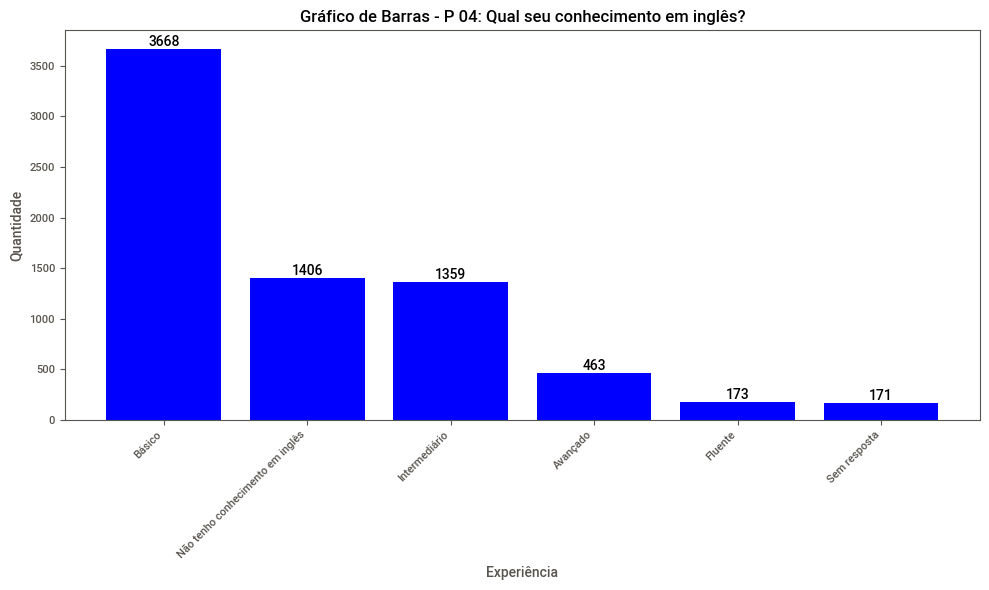

In [ ]:
# Define os dados para o gráfico de barras
labels = ['Básico', 'Não tenho conhecimento em inglês', 'Intermediário', 'Avançado', 'Fluente', 'Sem resposta']
values = [df_p04['Frequência Absoluta'][0], df_p04['Frequência Absoluta'][1], df_p04['Frequência Absoluta'][2], df_p04['Frequência Absoluta'][3],
          df_p04['Frequência Absoluta'][4], df_p04['Frequência Absoluta'][5]]

# Cria a figura e os eixos
plt.figure(figsize=(10, 6))

# Cria o gráfico de barras
plt.bar(labels, values, color='blue')

# Adiciona título e rótulos dos eixos
plt.title('Gráfico de Barras - P 04: Qual seu conhecimento em inglês?')
plt.xlabel('Experiência')
plt.ylabel('Quantidade')

# Rotaciona os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

# Adiciona valores acima das barras
for i, value in enumerate(values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Mostra o gráfico
plt.tight_layout()
plt.show()

<ipython-input-9-7aa3975950aa>:58: UserWarning: FixedFormatter should only be used together with FixedLocator


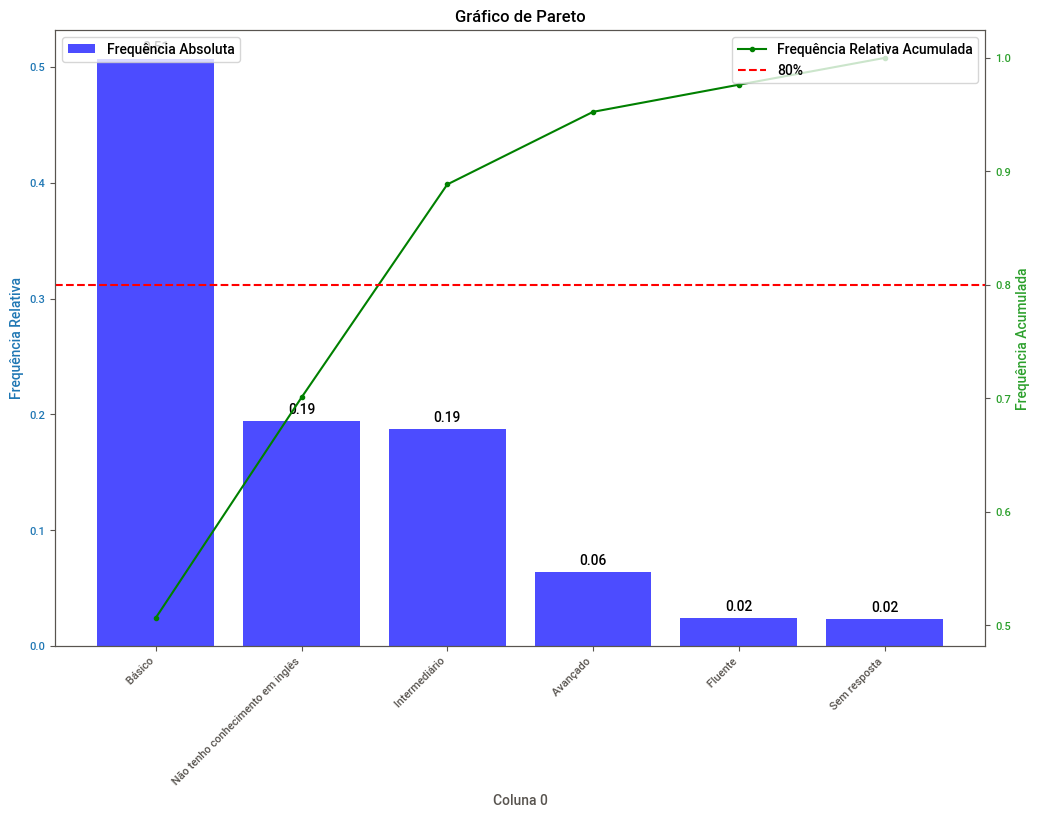

In [ ]:
#Gráfico de Pareto
plotar_grafico_pareto(df_p04, 0, 2, 3)

In [ ]:
#Análise IV
df_iv.get_bivariada('P 04: Qual seu conhecimento em inglês?')

==> "P 04: Qual seu conhecimento em inglês?" tem IV de 0.0052


Boa_Performance,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,P 04: Qual seu conhecimento em inglês?,Avançado,281,182,463,6.3950,6.8721,5.7759,60.6911,1.1898,0.1738,0.0019
1,P 04: Qual seu conhecimento em inglês?,Básico,2058,1610,3668,50.6630,50.3302,51.0949,56.1069,0.9850,-0.0151,0.0001
2,P 04: Qual seu conhecimento em inglês?,Fluente,107,66,173,2.3895,2.6168,2.0946,61.8497,1.2493,0.2226,0.0012
3,P 04: Qual seu conhecimento em inglês?,Intermediário,782,577,1359,18.7707,19.1245,18.3116,57.5423,1.0444,0.0434,0.0004
4,P 04: Qual seu conhecimento em inglês?,Não tenho conhecimento em inglês,763,643,1406,19.4199,18.6598,20.4062,54.2674,0.9144,-0.0895,0.0016
5,P 04: Qual seu conhecimento em inglês?,Sem resposta,98,73,171,2.3619,2.3967,2.3167,57.3099,1.0345,0.0339,0.0000


### **Insights P 04: Qual seu conhecimento em inglês?**



**Frequências**

1. Perfil Linguístico:
A maioria dos colaboradores (aproximadamente 50.66%) indicou ter um conhecimento básico em inglês. Isso sugere que a empresa tem uma base sólida de colaboradores com habilidades linguísticas básicas no idioma.
2. Nível de Proficiência:
Uma proporção significativa de colaboradores (aproximadamente 19.42%) indicou não ter conhecimento em inglês. Isso pode ter implicações em áreas que exigem comunicação em inglês, como suporte técnico internacional, comunicação com clientes estrangeiros, etc.
3. Variedade de Habilidades:
Embora a maioria tenha conhecimento básico, uma parcela considerável indicou ter habilidades intermediárias (18.77%), avançadas (6.40%) ou mesmo fluente (2.39%) em inglês. Isso sugere que a empresa possui colaboradores com uma variedade de habilidades linguísticas, o que pode ser útil em contextos multiculturais ou para tarefas específicas que exigem proficiência no idioma.
4. Respostas Não Fornecidas:
Uma pequena proporção de colaboradores (aproximadamente 2.36%) não respondeu à pergunta sobre seu conhecimento em inglês. Isso pode indicar falta de disponibilidade para responder ou possíveis áreas de melhoria na coleta de dados.

**ODDS**

* Avançado:
Tem uma probabilidade 19% maior de ter boa performance em comparação com a * * média.
* Básico:
Tem uma probabilidade 1% menor de ter boa performance em comparação com a média.
* Fluente:
Tem uma probabilidade 25% maior de ter boa performance em comparação com a média.
* Intermediário:
Tem uma probabilidade 4% maior de ter boa performance em comparação com a média.
* Não tenho conhecimento em inglês:
Tem uma probabilidade 9% menor de ter boa performance em comparação com a média.
* Sem resposta:
Tem uma probabilidade 3% maior de ter boa performance em comparação com a média.

**Information Value(IV)**

Essa variável possui IV muito baixo ou inexistente, por isso ela possui influência muito baixa sobre a variável Target Boa_Performance

## **P 05: Qual o tempo gasto no trajeto da sua residência até a empresa?**

Essa pergunta aborda a questão da mobilidade e do tempo gasto no deslocamento diário da residência até o local de trabalho. O tempo gasto no trajeto pode ser uma consideração importante para muitas pessoas ao avaliar oportunidades de emprego, escolher onde morar ou decidir sobre meios de transporte.

Compreender o tempo gasto no trajeto pode ajudar a entender os padrões de deslocamento dos respondentes, identificar questões de acessibilidade e transporte na região e avaliar o impacto do deslocamento na qualidade de vida e no equilíbrio entre trabalho e vida pessoal.

Além disso, para organizações ou instituições que coletam esses dados, compreender o tempo médio de deslocamento dos funcionários pode ajudar na gestão de horários, na implementação de políticas de flexibilidade no trabalho e no planejamento de infraestrutura e benefícios voltados para os funcionários.

No entanto, é importante considerar que o tempo de deslocamento pode variar significativamente entre os indivíduos, dependendo de vários fatores, como localização geográfica, meios de transporte disponíveis, condições do trânsito e preferências pessoais. Portanto, ao analisar esses dados, é importante levar em consideração essa diversidade de experiências e necessidades individuais.

In [ ]:
#Cria um data frame da coluna "P 05: Qual o tempo gasto no trajeto da sua residência até a empresa?"com a frequência absoluta, relativa e acumulada.
df_p05 = frequencias(df, 'P 05: Qual o tempo gasto no trajeto da sua residência até a empresa?')
df_p05

,P 05: Qual o tempo gasto no trajeto da sua residência até a empresa?,Frequência Absoluta,Frequência Relativa,Frequência Acumulada
0,Sem resposta,5033,0.695166,0.695166
1,De 1h à 1h30,712,0.098343,0.793508
2,De 30min à 1h,540,0.074586,0.868094
3,De 1h30 à 2h,523,0.072238,0.940331
4,Até 30min,314,0.043370,0.983702
5,Acima de 2h,118,0.016298,1.000000


<ipython-input-34-0335d89ede04>:25: UserWarning: Glyph 9 (	) missing from current font.
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.


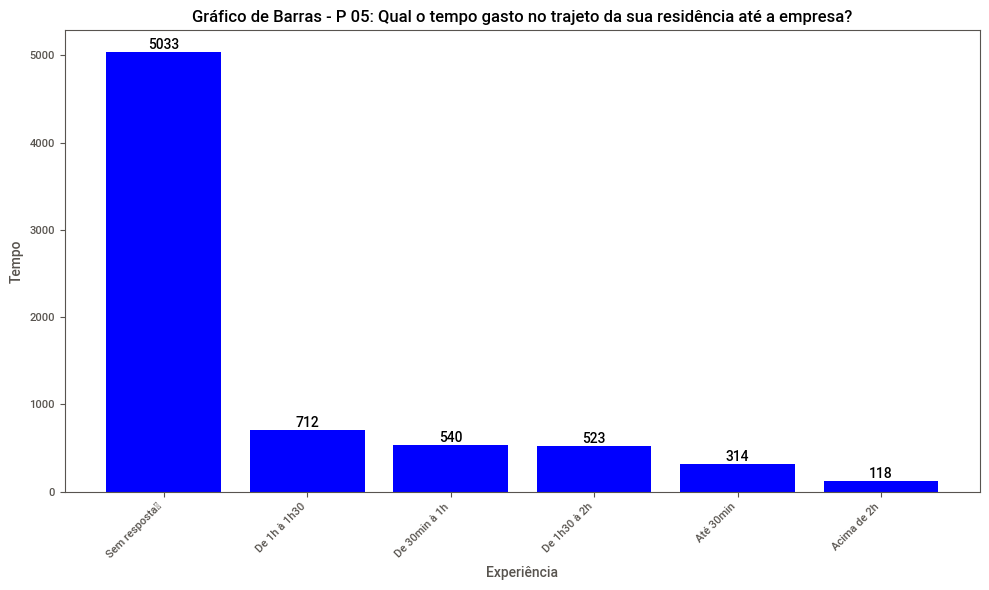

In [ ]:
# Define os dados para o gráfico de barras
labels = ['Sem resposta	', 'De 1h à 1h30', 'De 30min à 1h', 'De 1h30 à 2h', 'Até 30min', 'Acima de 2h']
values = [df_p05['Frequência Absoluta'][0], df_p05['Frequência Absoluta'][1], df_p05['Frequência Absoluta'][2], df_p05['Frequência Absoluta'][3],
          df_p05['Frequência Absoluta'][4], df_p05['Frequência Absoluta'][5]]

# Cria a figura e os eixos
plt.figure(figsize=(10, 6))

# Cria o gráfico de barras
plt.bar(labels, values, color='blue')

# Adiciona título e rótulos dos eixos
plt.title('Gráfico de Barras - P 05: Qual o tempo gasto no trajeto da sua residência até a empresa?')
plt.xlabel('Experiência')
plt.ylabel('Tempo')

# Rotaciona os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

# Adiciona valores acima das barras
for i, value in enumerate(values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Mostra o gráfico
plt.tight_layout()
plt.show()

<ipython-input-9-7aa3975950aa>:58: UserWarning: FixedFormatter should only be used together with FixedLocator


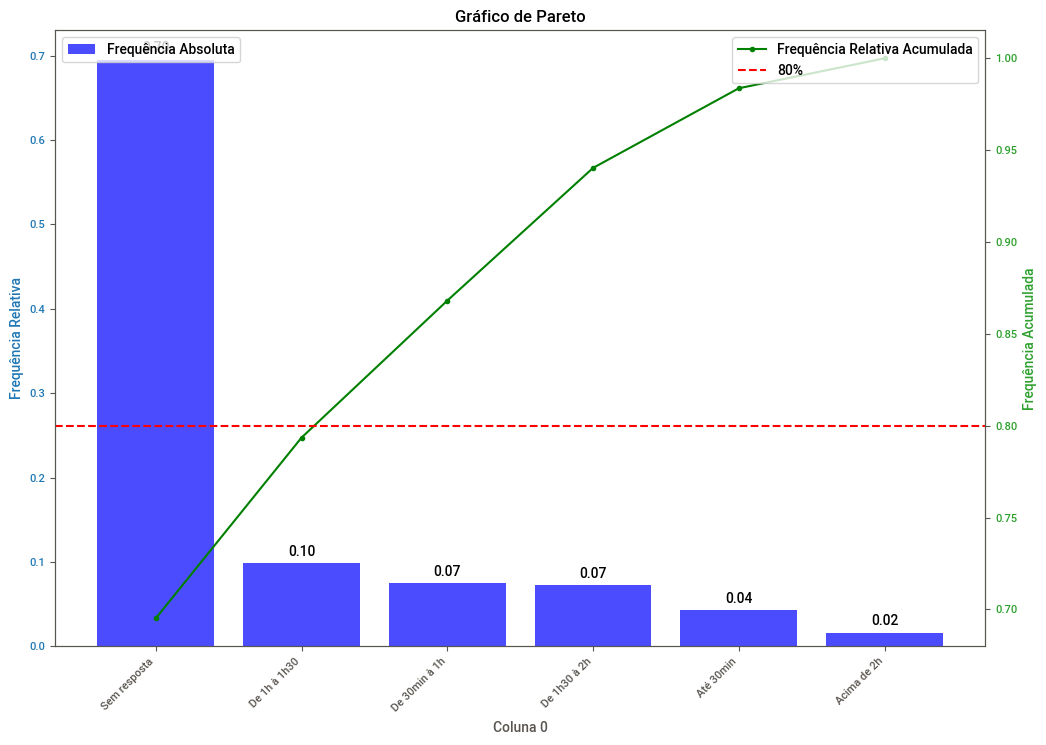

In [ ]:
plotar_grafico_pareto(df_p05, 0, 2, 3)

In [ ]:
df_iv.get_bivariada('P 05: Qual o tempo gasto no trajeto da sua residência até a empresa?')

==> "P 05: Qual o tempo gasto no trajeto da sua residência até a empresa?" tem IV de 0.0115


Boa_Performance,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,P 05: Qual o tempo gasto no trajeto da sua res...,Acima de 2h,53,65,118,1.6298,1.2962,2.0628,44.9153,0.6284,-0.4646,0.0036
1,P 05: Qual o tempo gasto no trajeto da sua res...,Até 30min,199,115,314,4.3370,4.8667,3.6496,63.3758,1.3335,0.2878,0.0035
2,P 05: Qual o tempo gasto no trajeto da sua res...,De 1h à 1h30,408,304,712,9.8343,9.9780,9.6477,57.3034,1.0342,0.0336,0.0001
3,P 05: Qual o tempo gasto no trajeto da sua res...,De 1h30 à 2h,266,257,523,7.2238,6.5053,8.1561,50.8604,0.7976,-0.2261,0.0037
4,P 05: Qual o tempo gasto no trajeto da sua res...,De 30min à 1h,317,223,540,7.4586,7.7525,7.0771,58.7037,1.0954,0.0911,0.0006
5,P 05: Qual o tempo gasto no trajeto da sua res...,Sem resposta,2846,2187,5033,69.5166,69.6014,69.4065,56.5468,1.0028,0.0028,0.0000


### **Insights P 05: Qual o tempo gasto no trajeto da sua residência até a empresa?**

**Frequência**

1. Sem resposta:
Frequência Absoluta: 5033
Frequência Relativa: 69.52%
Esta categoria tem a maior frequência, o que indica que uma parcela significativa dos colaboradores optou por não fornecer informações sobre o tempo de deslocamento.
Isso pode sugerir uma possível área de melhoria na coleta de dados ou que o tempo de deslocamento não é uma preocupação significativa para a maioria dos colaboradores.
2. De 1h à 1h30:
Frequência Absoluta: 712
Frequência Relativa: 9.83%
Esta categoria representa uma parcela considerável dos colaboradores, indicando que muitos gastam entre 1 hora e 1 hora e meia no trajeto de casa para o trabalho.
Pode indicar uma área de interesse para políticas de flexibilidade de horários ou opções de trabalho remoto para reduzir o tempo de deslocamento.
3. De 30min à 1h:
Frequência Absoluta: 540
Frequência Relativa: 7.46%
Outra categoria com uma frequência significativa, sugerindo que muitos colaboradores gastam entre 30 minutos e 1 hora no trajeto.
Essa faixa de tempo pode ser considerada comum em áreas urbanas, e políticas de transporte corporativo ou incentivos podem ser úteis para melhorar a experiência dos colaboradores.
4. De 1h30 à 2h:
Frequência Absoluta: 523
Frequência Relativa: 7.22%
Uma parcela considerável de colaboradores gasta entre 1 hora e meia e 2 horas no trajeto.
Isso pode indicar que a empresa está localizada em uma área com uma população mais dispersa ou que muitos colaboradores optam por morar mais longe em troca de moradia mais acessível.
5. Até 30min:
Frequência Absoluta: 314
Frequência Relativa: 4.34%
Uma proporção menor de colaboradores gasta até 30 minutos no trajeto, indicando que eles moram relativamente perto da empresa.
Esses colaboradores podem se beneficiar de políticas de incentivo ao uso de meios de transporte alternativos, como bicicleta ou caminhada.
6. Acima de 2h:
Frequência Absoluta: 118
Frequência Relativa: 1.63%
Uma pequena parcela de colaboradores gasta mais de 2 horas no trajeto, o que pode ser indicativo de desafios de acessibilidade ou opções limitadas de moradia na região.

Esses colaboradores podem se beneficiar de políticas de flexibilidade de horários ou trabalho remoto para mitigar o impacto do longo tempo de deslocamento em sua qualidade de vida.

**% Taxa de de Boa Performance**


A percentagem da taxa de Target 1 indica a proporção de indivíduos que têm boa performance em relação ao total de observações em cada categoria da variável "P 05: Qual o tempo gasto no trajeto da sua residência até a empresa?". Aqui estão alguns insights com base nesses valores:

1. Acima de 2h:
Apenas 1.63% dos colaboradores que gastam mais de 2 horas no trajeto têm boa performance.
Isso sugere que um longo tempo de deslocamento pode estar associado a uma menor probabilidade de boa performance.
2. Até 30min:
Cerca de 4.34% dos colaboradores que gastam até 30 minutos no trajeto têm boa performance.
Esta categoria apresenta uma taxa relativamente alta de boa performance, o que pode indicar que um tempo de deslocamento mais curto está associado a uma maior probabilidade de boa performance.
3. De 1h à 1h30:
Aproximadamente 9.83% dos colaboradores que gastam entre 1 hora e 1 hora e meia no trajeto têm boa performance.
Esta categoria apresenta uma taxa moderadamente alta de boa performance.
4. De 1h30 à 2h:
Cerca de 7.22% dos colaboradores que gastam entre 1 hora e meia e 2 horas no trajeto têm boa performance.
A taxa de boa performance é menor em comparação com outras categorias, o que pode sugerir que um tempo de deslocamento mais longo está associado a uma menor probabilidade de boa performance.
5. De 30min à 1h:
Cerca de 7.46% dos colaboradores que gastam entre 30 minutos e 1 hora no trajeto têm boa performance.
Esta categoria apresenta uma taxa moderadamente alta de boa performance.
6. Sem resposta:
Cerca de 69.52% dos colaboradores que não forneceram informações sobre o tempo de deslocamento têm boa performance.
Esta categoria tem uma alta taxa de boa performance, mas pode ser influenciada por uma grande proporção de observações.

## **P 06: Você possui dependentes?**

Essa pergunta aborda a questão da responsabilidade financeira e familiar, perguntando se a pessoa possui dependentes. Dependentes podem incluir filhos, cônjuges ou outros membros da família que dependem financeiramente da pessoa que responde à pergunta.

Compreender se alguém possui dependentes é importante em várias áreas, incluindo planejamento financeiro, benefícios de seguro e planejamento tributário. A presença de dependentes pode afetar as decisões financeiras de uma pessoa, como investimentos, seguros e poupança para a educação ou aposentadoria.

Além disso, essa informação também pode ser relevante para organizações ou instituições que coletam esses dados, pois pode impactar políticas de benefícios, licenças parentais e outras políticas relacionadas aos funcionários.

No entanto, é importante reconhecer que nem todas as situações familiares se encaixam na definição tradicional de dependentes, e as respostas podem variar de acordo com as circunstâncias individuais de cada pessoa. Portanto, é importante considerar a sensibilidade e a privacidade ao fazer essa pergunta e garantir que as informações sejam tratadas com confidencialidade.

In [ ]:
#Cria um data frame da coluna "P 06: Você possui dependentes?"com a frequência absoluta, relativa e acumulada.
df_p06 = frequencias(df, 'P 06: Você possui dependentes?')
df_p06

,P 06: Você possui dependentes?,Frequência Absoluta,Frequência Relativa,Frequência Acumulada
0,Não,4838,0.668232,0.668232
1,Sim,2269,0.313398,0.981630
2,Sem resposta,133,0.018370,1.000000


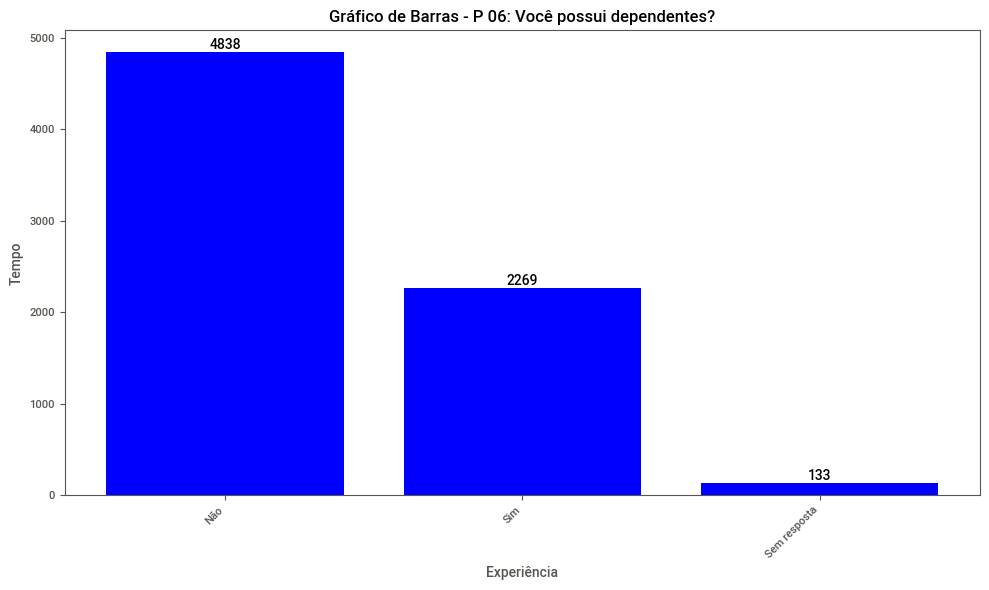

In [ ]:
# Define os dados para o gráfico de barras
labels = ['Não', 'Sim', 'Sem resposta']
values = [df_p06['Frequência Absoluta'][0], df_p06['Frequência Absoluta'][1], df_p06['Frequência Absoluta'][2]]

# Cria a figura e os eixos
plt.figure(figsize=(10, 6))

# Cria o gráfico de barras
plt.bar(labels, values, color='blue')

# Adiciona título e rótulos dos eixos
plt.title('Gráfico de Barras - P 06: Você possui dependentes?')
plt.xlabel('Experiência')
plt.ylabel('Tempo')

# Rotaciona os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

# Adiciona valores acima das barras
for i, value in enumerate(values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Mostra o gráfico
plt.tight_layout()
plt.show()

<ipython-input-9-7aa3975950aa>:58: UserWarning: FixedFormatter should only be used together with FixedLocator


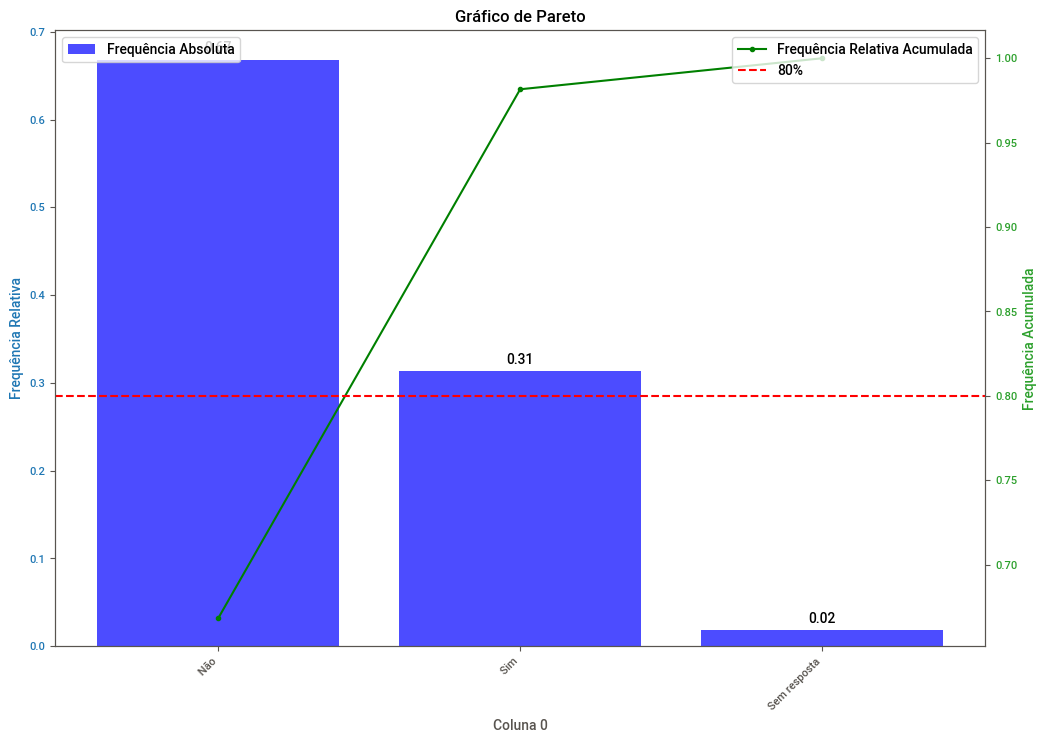

In [ ]:
plotar_grafico_pareto(df_p06, 0, 2, 3)

In [ ]:
df_iv.get_bivariada('P 06: Você possui dependentes?')

==> "P 06: Você possui dependentes?" tem IV de 0.0226


Boa_Performance,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,P 06: Você possui dependentes?,Não,2854,1984,4838,66.8232,69.7970,62.9641,58.9913,1.1085,0.1030,0.0070
1,P 06: Você possui dependentes?,Sem resposta,78,55,133,1.8370,1.9076,1.7455,58.6466,1.0929,0.0888,0.0001
2,P 06: Você possui dependentes?,Sim,1157,1112,2269,31.3398,28.2954,35.2904,50.9916,0.8018,-0.2209,0.0155


### **Insights P 06: Você possui dependentes?**

**Frequencia**
1. Maioria sem dependentes: A maioria das pessoas (cerca de 66.82%) não possui dependentes. Isso pode indicar uma tendência em direção a um estilo de vida mais independente ou uma distribuição demográfica em que muitos respondentes são solteiros ou sem filhos.
2. Significativa minoria com um dependente: Cerca de 31.34% das pessoas possuem um dependente. Isso sugere que uma parte considerável da amostra está envolvida em responsabilidades familiares ou cuidados com um dependente, como filhos, cônjuges ou pais idosos.
3. Baixa taxa de não resposta: A taxa de não resposta é relativamente baixa, representando apenas 1.83% da amostra. Isso indica que a maioria dos respondentes está disposta a fornecer informações sobre sua situação de dependentes, o que pode indicar uma alta qualidade dos dados.
4. Potencial para análises adicionais: Os dados podem ser segmentados ainda mais para explorar padrões demográficos ou socioeconômicos relacionados à presença de dependentes. Por exemplo, pode ser interessante analisar se há diferenças significativas nas taxas de dependência entre diferentes faixas etárias, gêneros ou regiões geográficas.
5. Implicações sociais e políticas: Esses dados podem ter implicações importantes para políticas sociais, como programas de assistência à família, cuidados infantis ou cuidados de saúde. Compreender a distribuição de dependência pode ajudar os formuladores de políticas a direcionar recursos de forma mais eficaz para atender às necessidades da população.

**Odds**

1. Não: Dos 4838 respondentes, 2854 (cerca de 66.82%) não possuem dependentes. A taxa de sucesso (target 1) entre aqueles que não possuem dependentes é de aproximadamente 69.80%, enquanto a taxa de falha (target 0) é de cerca de 62.96%. Isso resulta em uma taxa de sucesso relativa de aproximadamente 58.99%. A odds para essa categoria é 1.1085.
2. Sem resposta: Há 133 respostas sem resposta, com 78 (aproximadamente 58.65%) classificadas como sucesso (target 1) e 55 (aproximadamente 41.35%) como falha (target 0). A odds para essa categoria é 1.0929.
3. Sim: Dos 2269 respondentes, 1157 (aproximadamente 31.34%) possuem dependentes. A taxa de sucesso (target 1) entre aqueles que possuem dependentes é de aproximadamente 28.30%, enquanto a taxa de falha (target 0) é de cerca de 35.29%. Isso resulta em uma taxa de sucesso relativa de aproximadamente 50.99%. A odds para essa categoria é 0.8018.

**Information Value (IV)**

1. Variável Importante: Com um IV total de 0.0226, a variável "P 06: Você possui dependentes?" é considerada moderadamente importante na previsão da variável-alvo. Isso sugere que a presença ou ausência de dependentes tem um impacto significativo nas características que estamos tentando prever.
2. Influência das Categorias: As categorias individuais contribuem de forma diferente para o IV total. A categoria "Sim" (possuir dependentes) tem o IV mais alto, seguido pela categoria "Não", enquanto a categoria "Sem resposta" tem o menor IV. Isso indica que a presença de dependentes é uma variável mais informativa na previsão do alvo em comparação com a falta de resposta.
3. Identificação de Padrões: A análise das odds revela que há diferenças nas taxas de sucesso e falha entre as categorias. Por exemplo, aqueles que possuem dependentes têm uma taxa de sucesso relativamente menor em comparação com aqueles que não têm dependentes. Esses padrões podem ser explorados ainda mais para entender melhor as relações entre a presença de dependentes e outras variáveis.
4. Possíveis Implicações: O conhecimento sobre a presença de dependentes pode ser útil em várias áreas, como planejamento familiar, políticas sociais e de saúde. Compreender como essa variável influencia as características que estamos tentando prever pode ajudar na tomada de decisões mais informadas em diversas áreas.

## **P 07: É bom trabalhar com meus colegas de trabalho.**


Essa frase sugere uma atitude positiva em relação ao ambiente de trabalho e aos colegas. Ela indica que a pessoa aprecia colaborar e interagir com seus colegas durante o trabalho.

Essa atitude pode contribuir para um ambiente de trabalho mais saudável e produtivo. A capacidade de trabalhar bem em equipe é fundamental para o sucesso de muitos projetos e iniciativas, pois promove a troca de ideias, a cooperação e o apoio mútuo entre os membros da equipe.

Além disso, um relacionamento positivo com os colegas pode aumentar o engajamento no trabalho e a satisfação no emprego, criando um ambiente onde as pessoas se sintam valorizadas e motivadas a contribuir para os objetivos comuns da organização.

No entanto, é importante reconhecer que nem todos os ambientes de trabalho são igualmente colaborativos e positivos. Se alguém não se sente confortável ou satisfeito com seus colegas de trabalho, isso pode afetar negativamente seu bem-estar e desempenho no trabalho.

Portanto, essa afirmação sugere uma experiência positiva e gratificante no ambiente de trabalho, mas é importante estar ciente de que isso pode variar de pessoa para pessoa e de acordo com as dinâmicas específicas da equipe e da organização.

In [ ]:
#Cria um data frame da coluna "P 07: É bom trabalhar com meus colegas de trabalho."com a frequência absoluta, relativa e acumulada.
df_p07 = frequencias(df, 'P 07: É bom trabalhar com meus colegas de trabalho.')
df_p07

,P 07: É bom trabalhar com meus colegas de trabalho.,Frequência Absoluta,Frequência Relativa,Frequência Acumulada
0,5 - Concordo totalmente,3296,0.455249,0.455249
1,4 - Concordo,2687,0.371133,0.826381
2,0 - Sem resposta,684,0.094475,0.920856
3,3 - Indiferente,514,0.070994,0.991851
4,2 - Discordo,45,0.006215,0.998066
5,1 - Discordo totalmente,14,0.001934,1.000000


<ipython-input-42-acf4292f9b00>:25: UserWarning: Glyph 9 (	) missing from current font.
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.


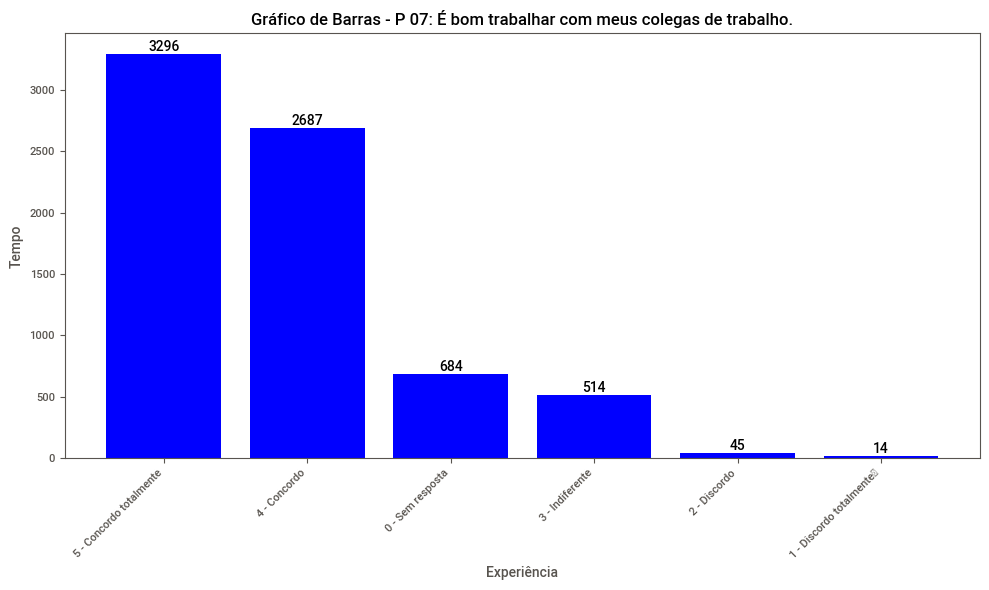

In [ ]:
# Define os dados para o gráfico de barras
labels = ['5 - Concordo totalmente', '4 - Concordo', '0 - Sem resposta', '3 - Indiferente', '2 - Discordo', '1 - Discordo totalmente	']
values = [df_p07['Frequência Absoluta'][0], df_p07['Frequência Absoluta'][1], df_p07['Frequência Absoluta'][2], df_p07['Frequência Absoluta'][3], df_p07['Frequência Absoluta'][4],
          df_p07['Frequência Absoluta'][5]]

# Cria a figura e os eixos
plt.figure(figsize=(10, 6))

# Cria o gráfico de barras
plt.bar(labels, values, color='blue')

# Adiciona título e rótulos dos eixos
plt.title('Gráfico de Barras - P 07: É bom trabalhar com meus colegas de trabalho.')
plt.xlabel('Experiência')
plt.ylabel('Tempo')

# Rotaciona os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

# Adiciona valores acima das barras
for i, value in enumerate(values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Mostra o gráfico
plt.tight_layout()
plt.show()

<ipython-input-9-7aa3975950aa>:58: UserWarning: FixedFormatter should only be used together with FixedLocator


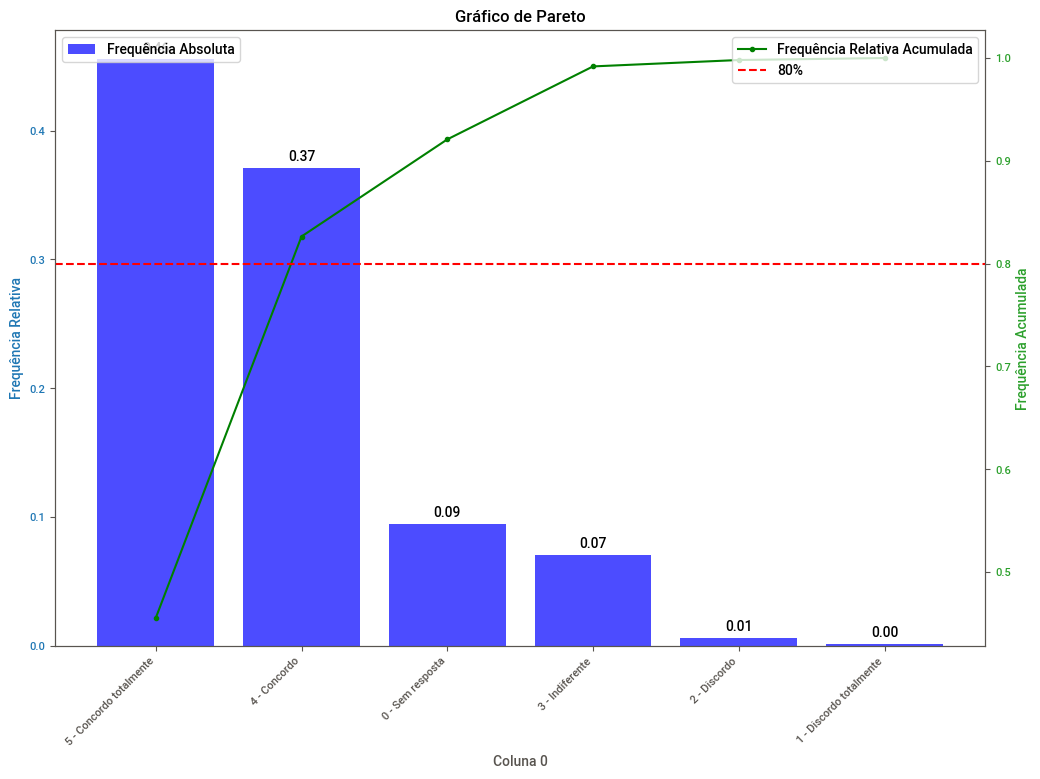

In [ ]:
plotar_grafico_pareto(df_p07, 0, 2, 3)

In [ ]:
df_iv.get_bivariada('P 07: É bom trabalhar com meus colegas de trabalho.')

==> "P 07: É bom trabalhar com meus colegas de trabalho." tem IV de 0.0263


Boa_Performance,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,P 07: É bom trabalhar com meus colegas de trab...,0 - Sem resposta,392,292,684,9.4475,9.5867,9.2669,57.3099,1.0345,0.0339,0.0001
1,P 07: É bom trabalhar com meus colegas de trab...,1 - Discordo totalmente,7,7,14,0.1934,0.1712,0.2222,50.0000,0.7705,-0.2607,0.0001
2,P 07: É bom trabalhar com meus colegas de trab...,2 - Discordo,16,29,45,0.6215,0.3913,0.9203,35.5556,0.4252,-0.8552,0.0045
3,P 07: É bom trabalhar com meus colegas de trab...,3 - Indiferente,235,279,514,7.0994,5.7471,8.8543,45.7198,0.6491,-0.4322,0.0134
4,P 07: É bom trabalhar com meus colegas de trab...,4 - Concordo,1478,1209,2687,37.1133,36.1458,38.3688,55.0056,0.9421,-0.0596,0.0013
5,P 07: É bom trabalhar com meus colegas de trab...,5 - Concordo totalmente,1961,1335,3296,45.5249,47.9579,42.3675,59.4964,1.1320,0.1240,0.0069


### **Insights P 07: É bom trabalhar com meus colegas de trabalho?**

**Frequência**

1. Maioria Concorda Totalmente: A maioria dos respondentes (cerca de 45.52%) concorda totalmente que é bom trabalhar com seus colegas de trabalho (3296 de um total de 7260 respondentes). Isso sugere um ambiente de trabalho onde a colaboração e a harmonia são valorizadas, o que pode contribuir para uma cultura organizacional positiva.
2. Grande Proporção de Concordância: Além disso, uma proporção significativa de respondentes (37.11%) concorda que é bom trabalhar com seus colegas de trabalho, mesmo que não seja uma concordância total. Isso indica que, mesmo que nem todos os respondentes concordem totalmente, há uma maioria que percebe aspectos positivos nas interações com colegas de trabalho.
3. Baixa Taxa de Não Resposta: A taxa de não resposta é relativamente baixa, representando apenas 9.45% das respostas. Isso sugere que a maioria dos respondentes estava disposta a fornecer uma opinião sobre sua experiência de trabalhar com colegas.
4. Baixa Discordância: As categorias de discordância têm uma frequência relativamente baixa, com apenas 6.22% dos respondentes discordando (entre aqueles que discordam totalmente e aqueles que discordam parcialmente). Isso pode indicar que, apesar das diferenças individuais, a maioria dos respondentes não percebe grandes problemas em trabalhar com colegas de trabalho.
6. Implicações para o Ambiente de Trabalho: Esses dados podem indicar um ambiente de trabalho geralmente positivo, onde a colaboração e a cooperação entre os colegas são valorizadas. Isso pode ter implicações importantes para a produtividade, satisfação no trabalho e retenção de funcionários.

**Odds**

1. Sem resposta: Dos 684 respondentes, 392 (cerca de 9.45%) não forneceram resposta sobre se é bom trabalhar com colegas de trabalho. A taxa de sucesso (target 1) entre aqueles sem resposta é de aproximadamente 9.59%, enquanto a taxa de falha (target 0) é de cerca de 9.27%. Isso resulta em uma taxa de sucesso relativa de aproximadamente 57.31%. A odds para essa categoria é 1.0345.
2. Discordo totalmente: Dos 14 respondentes, apenas 7 (cerca de 0.19%) discordam totalmente que é bom trabalhar com colegas de trabalho. A odds para essa categoria é 0.7705.
3. Discordo: Dos 45 respondentes, 16 (cerca de 0.62%) discordam que é bom trabalhar com colegas de trabalho. A odds para essa categoria é 0.4252.
Indiferente: Dos 514 respondentes, 235 (cerca de 7.10%) são indiferentes em relação a trabalhar com colegas de trabalho. A odds para essa categoria é 0.6491.
5. Concordo: Dos 2687 respondentes, 1478 (cerca de 37.11%) concordam que é bom trabalhar com colegas de trabalho. A odds para essa categoria é 0.9421.
6. Concordo totalmente: Dos 3296 respondentes, 1961 (cerca de 45.52%) concordam totalmente que é bom trabalhar com colegas de trabalho. A odds para essa categoria é 1.1320.

**Information Value(IV)**
Com um IV total de 0.0263, a variável "P 07: É bom trabalhar com meus colegas de trabalho?" é considerada moderadamente importante na previsão da variável-alvo. Isso sugere que as respostas dos respondentes em relação à percepção de trabalhar com colegas de trabalho têm um impacto significativo na previsão da variável-alvo.

## **P 08: Não tenho medo de criticar pessoas em cargos de liderança.**


Essa frase sugere uma atitude de coragem e assertividade em relação à crítica de pessoas em posições de liderança. Ela indica que a pessoa não hesita em expressar opiniões críticas, mesmo quando direcionadas a figuras de autoridade ou hierarquicamente superiores.

Essa postura pode ser vista como positiva em alguns contextos, especialmente em ambientes onde a transparência, a honestidade e a abertura ao feedback são valorizadas. Pode refletir um compromisso com a melhoria contínua e uma cultura organizacional que encoraja o debate e a diversidade de pontos de vista.

No entanto, é importante exercer essa liberdade com responsabilidade e consideração pelos outros. A crítica construtiva pode ser uma ferramenta poderosa para impulsionar mudanças positivas, mas deve ser comunicada de maneira respeitosa e fundamentada em fatos, evitando ataques pessoais ou desrespeito à autoridade legítima.

Portanto, essa afirmação sugere uma disposição para desafiar o status quo e buscar a excelência, desde que seja feita de forma respeitosa e com o objetivo genuíno de promover melhorias.

In [ ]:
#Cria um data frame da coluna "P 08: Não tenho medo de criticar pessoas em cargos de liderança."com a frequência absoluta, relativa e acumulada.
df_p08 = frequencias(df, 'P 08: Não tenho medo de criticar pessoas em cargos de liderança.')
df_p08

,P 08: Não tenho medo de criticar pessoas em cargos de liderança.,Frequência Absoluta,Frequência Relativa,Frequência Acumulada
0,3 - Indiferente,1853,0.255939,0.255939
1,2 - Discordo,1831,0.252901,0.508840
2,4 - Concordo,1744,0.240884,0.749724
3,0 - Sem resposta,684,0.094475,0.844199
4,1 - Discordo totalmente,668,0.092265,0.936464
5,5 - Concordo totalmente,460,0.063536,1.000000


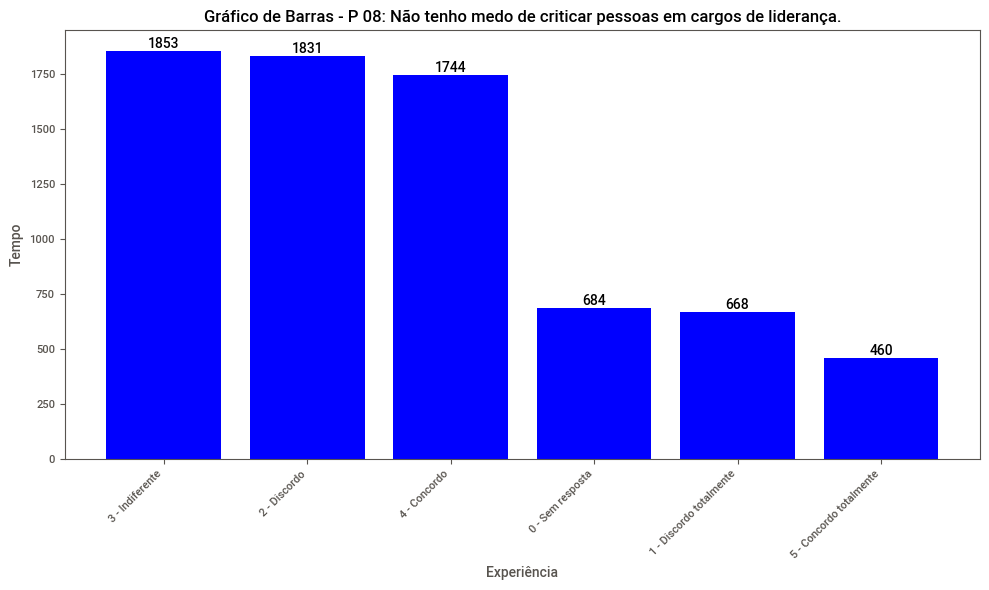

In [ ]:
# Define os dados para o gráfico de barras
labels = ['3 - Indiferente', '2 - Discordo', '4 - Concordo', '0 - Sem resposta', '1 - Discordo totalmente', '5 - Concordo totalmente']
values = [df_p08['Frequência Absoluta'][0], df_p08['Frequência Absoluta'][1], df_p08['Frequência Absoluta'][2], df_p08['Frequência Absoluta'][3], df_p08['Frequência Absoluta'][4],
          df_p08['Frequência Absoluta'][5]]

# Cria a figura e os eixos
plt.figure(figsize=(10, 6))

# Cria o gráfico de barras
plt.bar(labels, values, color='blue')

# Adiciona título e rótulos dos eixos
plt.title('Gráfico de Barras - P 08: Não tenho medo de criticar pessoas em cargos de liderança.')
plt.xlabel('Experiência')
plt.ylabel('Tempo')

# Rotaciona os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

# Adiciona valores acima das barras
for i, value in enumerate(values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Mostra o gráfico
plt.tight_layout()
plt.show()

<ipython-input-9-7aa3975950aa>:58: UserWarning: FixedFormatter should only be used together with FixedLocator


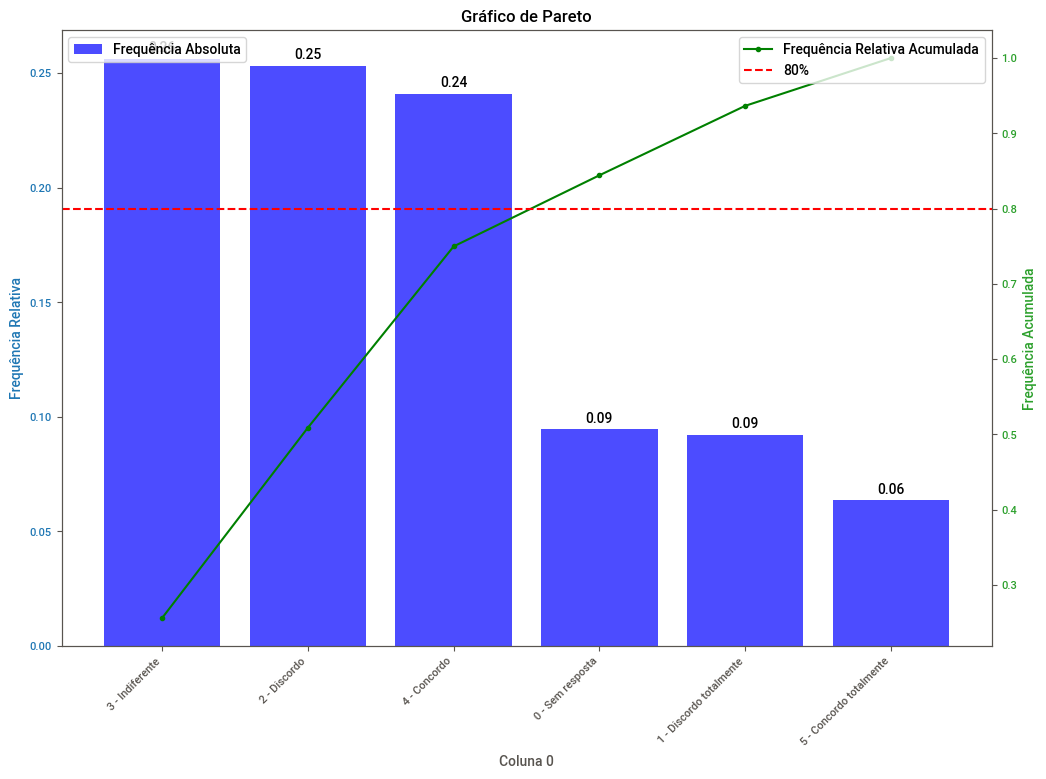

In [ ]:
plotar_grafico_pareto(df_p08, 0, 2, 3)

In [ ]:
df_iv.get_bivariada('P 08: Não tenho medo de criticar pessoas em cargos de liderança.')

==> "P 08: Não tenho medo de criticar pessoas em cargos de liderança." tem IV de 0.0081


Boa_Performance,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,P 08: Não tenho medo de criticar pessoas em ca...,0 - Sem resposta,392,292,684,9.4475,9.5867,9.2669,57.3099,1.0345,0.0339,0.0001
1,P 08: Não tenho medo de criticar pessoas em ca...,1 - Discordo totalmente,372,296,668,9.2265,9.0976,9.3938,55.6886,0.9685,-0.0320,0.0001
2,P 08: Não tenho medo de criticar pessoas em ca...,2 - Discordo,1025,806,1831,25.2901,25.0673,25.5792,55.9803,0.9800,-0.0202,0.0001
3,P 08: Não tenho medo de criticar pessoas em ca...,3 - Indiferente,1091,762,1853,25.5939,26.6813,24.1828,58.8775,1.1033,0.0983,0.0025
4,P 08: Não tenho medo de criticar pessoas em ca...,4 - Concordo,982,762,1744,24.0884,24.0157,24.1828,56.3073,0.9931,-0.0069,0.0000
5,P 08: Não tenho medo de criticar pessoas em ca...,5 - Concordo totalmente,227,233,460,6.3536,5.5515,7.3945,49.3478,0.7508,-0.2866,0.0053


### **Insights P 08: Não tenho medo de criticar pessoas em cargos de liderança.**

**Frequências**

1. Indiferença predominante: A categoria mais frequente entre os respondentes é "Indiferente" (3 - Indiferente), com 1853 respostas, representando aproximadamente 25.59% dos respondentes. Isso sugere que uma parte significativa dos respondentes não tem uma opinião forte sobre criticar pessoas em cargos de liderança.
2. Proporção substancial de discordância: As categorias "Discordo" (2 - Discordo) e "Discordo totalmente" (1 - Discordo totalmente) combinadas representam uma proporção considerável das respostas, com 1831 e 668 respostas, respectivamente. Isso indica que há uma parte significativa dos respondentes que discordam ou discordam totalmente de criticar pessoas em cargos de liderança.
3. Aprovação moderada: As categorias "Concordo" (4 - Concordo) e "Concordo totalmente" (5 - Concordo totalmente) combinadas também representam uma proporção considerável das respostas, com 1744 e 460 respostas, respectivamente. Isso sugere que há uma parte dos respondentes que concorda ou concorda totalmente em criticar pessoas em cargos de liderança.
4. Baixa taxa de não resposta: A taxa de não resposta é relativamente baixa, com 684 respostas (aproximadamente 9.45% dos respondentes) não fornecendo uma resposta sobre essa questão. Isso indica que a maioria dos respondentes estava disposta a expressar sua opinião sobre criticar pessoas em cargos de liderança.

**ODDS**

1. Sem resposta: A categoria "Sem resposta" possui uma odds de 1.0345. Isso indica que os respondentes que não forneceram resposta têm ligeiramente mais chance de concordar em criticar pessoas em cargos de liderança, em comparação com a média das respostas.
2. Discordo totalmente: A categoria "Discordo totalmente" tem uma odds de 0.9685. Isso sugere que os respondentes que discordam totalmente de criticar pessoas em cargos de liderança têm uma probabilidade ligeiramente menor de realmente concordar com essa afirmação, em comparação com a média das respostas.
3. Discordo: A categoria "Discordo" tem uma odds de 0.9800. Isso indica que os respondentes que discordam de criticar pessoas em cargos de liderança têm uma probabilidade um pouco menor de realmente concordar com essa afirmação, em comparação com a média das respostas.
4. Indiferente: A categoria "Indiferente" possui uma odds de 1.1033. Isso sugere que os respondentes que são indiferentes em relação a criticar pessoas em cargos de liderança têm uma probabilidade um pouco maior de concordar com essa afirmação, em comparação com a média das respostas.
5. Concordo: A categoria "Concordo" tem uma odds de 0.9931. Isso indica que os respondentes que concordam em criticar pessoas em cargos de liderança têm uma probabilidade ligeiramente menor de realmente concordar com essa afirmação, em comparação com a média das respostas.
6. Concordo totalmente: A categoria "Concordo totalmente" possui uma odds de 0.7508. Isso sugere que os respondentes que concordam totalmente em criticar pessoas em cargos de liderança têm uma probabilidade significativamente menor de realmente concordar com essa afirmação, em comparação com a média das respostas.

**Information Value (IV)**

O IV (Information Value) total para a variável é de 0.0081, o que indica uma importância moderada na previsão da variável-alvo. Isso sugere que as respostas dos respondentes sobre o medo de criticar pessoas em cargos de liderança têm um impacto moderado na previsão da variável-alvo.

Cada categoria contribui de forma diferente para o IV total:

As categorias "Indiferente" e "Concordo totalmente" têm os IVs mais altos, sugerindo que as respostas nessas categorias são mais informativas para a previsão da variável-alvo.
As categorias "Sem resposta", "Discordo totalmente", "Discordo" e "Concordo" têm IVs mais baixos, mas ainda contribuem para a previsão da variável-alvo em diferentes graus.



In [ ]:
df.columns

Index(['Id_Agente', 'Boa_Performance',
       'P 01: Antes de trabalhar na empresa, você tinha experiência em Contact Center?',
       'P 02: Qual área de atendimento você atua ou atuou por mais tempo?',
       'P 03: Qual a sua escolaridade?',
       'P 04: Qual seu conhecimento em inglês?',
       'P 05: Qual o tempo gasto no trajeto da sua residência até a empresa?',
       'P 06: Você possui dependentes?',
       'P 07: É bom trabalhar com meus colegas de trabalho.',
       'P 08: Não tenho medo de criticar pessoas em cargos de liderança.',
       'P 09: Fico tenso quando estou trabalhando.',
       'P 10: Não gosto de situações que requerem que eu me comporte de forma controlada.',
       'P 11: Gosto de dizer o que penso.',
       'P 12: Gosto de fazer as coisas do meu jeito e não ligo para o que possam pensar.'],
      dtype='object')

## **P 09: Fico tenso quando estou trabalhando.**

Essa frase sugere que a pessoa experimenta tensão ou ansiedade enquanto está trabalhando. É importante notar que o termo "tenso" pode ter interpretações variadas, podendo se referir a uma ampla gama de emoções, desde nervosismo até estresse. No entanto, o contexto sugere que a pessoa pode se sentir desconfortável, preocupada ou sob pressão durante suas atividades de trabalho.

Essa afirmação pode indicar que a pessoa está enfrentando desafios ou dificuldades em seu ambiente de trabalho, seja devido a prazos apertados, responsabilidades exigentes ou interações estressantes com colegas. Também pode refletir uma predisposição pessoal à ansiedade ou uma incompatibilidade entre as exigências do trabalho e as habilidades ou preferências individuais.

É importante reconhecer a importância do bem-estar emocional no ambiente de trabalho e considerar maneiras de gerenciar e reduzir o estresse, se necessário, para promover um ambiente de trabalho mais saudável e produtivo.

In [ ]:
#Cria um data frame da coluna "P 09: Fico tenso quando estou trabalhando."com a frequência absoluta, relativa e acumulada.
df_p09 = frequencias(df, 'P 09: Fico tenso quando estou trabalhando.')
df_p09

,P 09: Fico tenso quando estou trabalhando.,Frequência Absoluta,Frequência Relativa,Frequência Acumulada
0,2 - Discordo,2725,0.376381,0.376381
1,3 - Indiferente,1798,0.248343,0.624724
2,1 - Discordo totalmente,1066,0.147238,0.771961
3,4 - Concordo,780,0.107735,0.879696
4,0 - Sem resposta,684,0.094475,0.974171
5,5 - Concordo totalmente,187,0.025829,1.000000


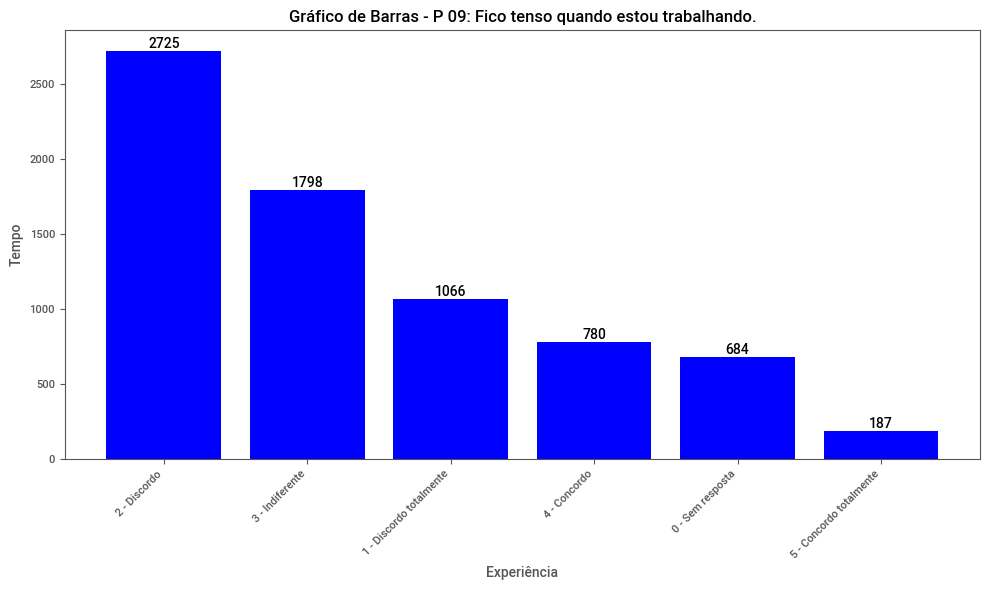

In [ ]:
# Define os dados para o gráfico de barras
labels = ['2 - Discordo', '3 - Indiferente', '1 - Discordo totalmente', '4 - Concordo', '0 - Sem resposta', '5 - Concordo totalmente']
values = [df_p09['Frequência Absoluta'][0], df_p09['Frequência Absoluta'][1], df_p09['Frequência Absoluta'][2], df_p09['Frequência Absoluta'][3], df_p09['Frequência Absoluta'][4],
          df_p09['Frequência Absoluta'][5]]

# Cria a figura e os eixos
plt.figure(figsize=(10, 6))

# Cria o gráfico de barras
plt.bar(labels, values, color='blue')

# Adiciona título e rótulos dos eixos
plt.title('Gráfico de Barras - P 09: Fico tenso quando estou trabalhando.')
plt.xlabel('Experiência')
plt.ylabel('Tempo')

# Rotaciona os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

# Adiciona valores acima das barras
for i, value in enumerate(values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Mostra o gráfico
plt.tight_layout()
plt.show()

<ipython-input-9-7aa3975950aa>:58: UserWarning: FixedFormatter should only be used together with FixedLocator


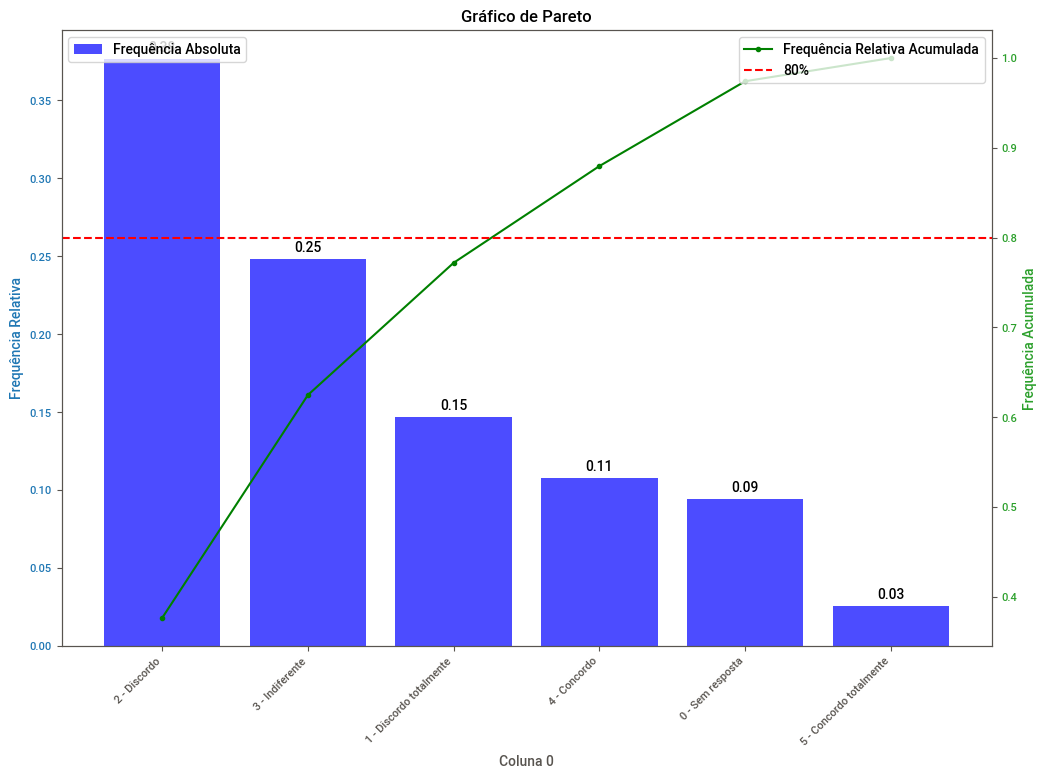

In [ ]:
plotar_grafico_pareto(df_p09, 0, 2, 3)

In [ ]:
df_iv.get_bivariada('P 09: Fico tenso quando estou trabalhando.')

==> "P 09: Fico tenso quando estou trabalhando." tem IV de 0.0032


Boa_Performance,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,P 09: Fico tenso quando estou trabalhando.,0 - Sem resposta,392,292,684,9.4475,9.5867,9.2669,57.3099,1.0345,0.0339,0.0001
1,P 09: Fico tenso quando estou trabalhando.,1 - Discordo totalmente,610,456,1066,14.7238,14.9181,14.4716,57.2233,1.0309,0.0304,0.0001
2,P 09: Fico tenso quando estou trabalhando.,2 - Discordo,1534,1191,2725,37.6381,37.5153,37.7975,56.2936,0.9925,-0.0075,0.0000
3,P 09: Fico tenso quando estou trabalhando.,3 - Indiferente,1023,775,1798,24.8343,25.0183,24.5954,56.8966,1.0172,0.0171,0.0001
4,P 09: Fico tenso quando estou trabalhando.,4 - Concordo,440,340,780,10.7735,10.7606,10.7902,56.4103,0.9973,-0.0027,0.0000
5,P 09: Fico tenso quando estou trabalhando.,5 - Concordo totalmente,90,97,187,2.5829,2.2010,3.0784,48.1283,0.7150,-0.3355,0.0029


### **Insights P 09: Fico tenso quando estou trabalhando.**

**Frequências**

1. Maioria Discorda ou é Indiferente: As categorias "Discordo" (2 - Discordo) e "Indiferente" (3 - Indiferente) têm as maiores frequências, representando 37.64% e 24.83% dos respondentes, respectivamente. Isso sugere que uma parte significativa dos respondentes não se sente tenso quando está trabalhando ou tem uma atitude neutra em relação a isso.
2. Proporção Substancial de Discordância Total: A categoria "Discordo totalmente" (1 - Discordo totalmente) representa 14.72% dos respondentes, indicando que uma parcela considerável discorda totalmente de se sentir tenso enquanto trabalha. Isso pode sugerir um ambiente de trabalho relativamente tranquilo ou a presença de estratégias eficazes para lidar com o estresse.
3. Baixa Taxa de Concordância: As categorias de concordância ("Concordo" e "Concordo totalmente") juntas representam uma proporção menor das respostas, com 10.77% e 2.58% dos respondentes, respectivamente. Isso sugere que uma minoria dos respondentes se sente tensa enquanto trabalha.
4. Baixa Taxa de Não Resposta: A taxa de não resposta é relativamente baixa, com 9.45% dos respondentes não fornecendo uma resposta sobre se ficam tensos enquanto trabalham. Isso indica que a maioria dos respondentes estava disposta a expressar sua opinião sobre esse aspecto.

Os insights sugerem uma diversidade de sentimentos, com a maioria discordando ou sendo indiferente, e uma proporção menor concordando ou discordando totalmente. Isso pode ser útil para entender o ambiente de trabalho e identificar áreas que podem precisar de suporte adicional para gerenciamento de estresse.

**ODDS**

1. Sem resposta: A categoria "Sem resposta" possui uma odds de 1.0345. Isso indica que os respondentes que não forneceram resposta têm uma ligeira probabilidade maior de discordar totalmente de ficar tenso quando estão trabalhando, em comparação com a média das respostas.
2. Discordo totalmente: A categoria "Discordo totalmente" tem uma odds de 1.0309. Isso sugere que os respondentes que discordam totalmente de ficar tenso quando estão trabalhando têm uma probabilidade ligeiramente maior de discordar totalmente, em comparação com a média das respostas.
3. Discordo: A categoria "Discordo" possui uma odds de 0.9925. Isso indica que os respondentes que discordam de ficar tenso quando estão trabalhando têm uma probabilidade ligeiramente menor de discordar, em comparação com a média das respostas.
4. Indiferente: A categoria "Indiferente" tem uma odds de 1.0172. Isso sugere que os respondentes que são indiferentes em relação a ficar tenso quando estão trabalhando têm uma probabilidade ligeiramente maior de discordar, em comparação com a média das respostas.
5. Concordo: A categoria "Concordo" possui uma odds de 0.9973. Isso indica que os respondentes que concordam em ficar tenso quando estão trabalhando têm uma probabilidade ligeiramente menor de concordar, em comparação com a média das respostas.
6. Concordo totalmente: A categoria "Concordo totalmente" possui uma odds de 0.7150. Isso sugere que os respondentes que concordam totalmente em ficar tenso quando estão trabalhando têm uma probabilidade significativamente menor de concordar, em comparação com a média das respostas.

**Information Value(IV)**

O IV (Information Value) total para a variável é de 0.0032, o que indica uma importância muito baixa na previsão da variável-alvo. Isso sugere que as respostas dos respondentes sobre ficar tenso quando estão trabalhando têm um impacto muito limitado na previsão da variável-alvo.

Cada categoria contribui de forma diferente para o IV total:

* As categorias "Discordo" e "Indiferente" contribuem positivamente para o IV total, enquanto as outras categorias têm contribuições negativas. No entanto, o IV total é muito baixo, o que sugere que as respostas para esta variável podem não ser muito informativas para prever a variável-alvo.

Esses insights indicam que as respostas para esta variável podem não ser altamente preditivas em relação à variável-alvo, com odds próximas à média e um IV total muito baixo.

## **P 10: Não gosto de situações que requerem que eu me comporte de forma controlada.**

Essa frase sugere uma aversão a situações que exigem comportamento controlado ou contido. Ela reflete uma preferência por liberdade e espontaneidade, indicando uma personalidade mais voltada para a autonomia e a expressão individual. Pode-se interpretar que a pessoa que concorda com essa afirmação prefere ambientes menos estruturados, onde possa agir de acordo com seus instintos e emoções, sem se sentir restrita por normas ou expectativas sociais de comportamento controlado. Essa atitude pode ser vista como positiva em contextos que valorizam a criatividade, a originalidade e a espontaneidade, mas também pode gerar desafios em situações que exigem conformidade ou controle emocional.

In [ ]:
#Cria um data frame da coluna "P 10: Não gosto de situações que requerem que eu me comporte de forma controlada."com a frequência absoluta, relativa e acumulada.
df_p10 = frequencias(df, 'P 10: Não gosto de situações que requerem que eu me comporte de forma controlada.')
df_p10

,P 10: Não gosto de situações que requerem que eu me comporte de forma controlada.,Frequência Absoluta,Frequência Relativa,Frequência Acumulada
0,3 - Indiferente,2282,0.315193,0.315193
1,2 - Discordo,2115,0.292127,0.607320
2,1 - Discordo totalmente,1037,0.143232,0.750552
3,4 - Concordo,887,0.122514,0.873066
4,0 - Sem resposta,684,0.094475,0.967541
5,5 - Concordo totalmente,235,0.032459,1.000000


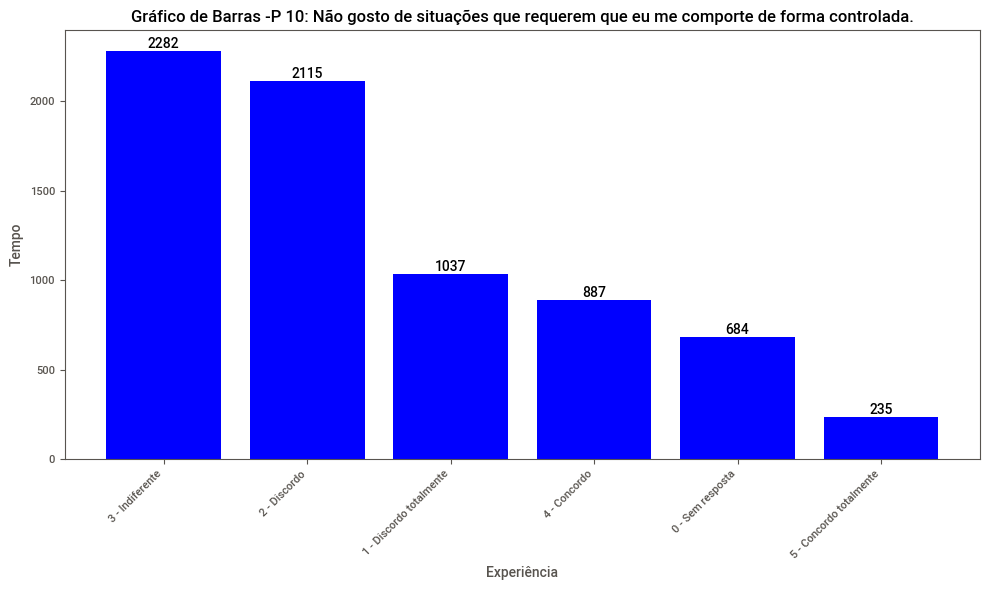

In [ ]:
# Define os dados para o gráfico de barras
labels = ['3 - Indiferente', '2 - Discordo', '1 - Discordo totalmente', '4 - Concordo', '0 - Sem resposta', '5 - Concordo totalmente']
values = [df_p10['Frequência Absoluta'][0], df_p10['Frequência Absoluta'][1], df_p10['Frequência Absoluta'][2], df_p10['Frequência Absoluta'][3], df_p10['Frequência Absoluta'][4],
          df_p10['Frequência Absoluta'][5]]

# Cria a figura e os eixos
plt.figure(figsize=(10, 6))

# Cria o gráfico de barras
plt.bar(labels, values, color='blue')

# Adiciona título e rótulos dos eixos
plt.title('Gráfico de Barras -P 10: Não gosto de situações que requerem que eu me comporte de forma controlada.')
plt.xlabel('Experiência')
plt.ylabel('Tempo')

# Rotaciona os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

# Adiciona valores acima das barras
for i, value in enumerate(values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Mostra o gráfico
plt.tight_layout()
plt.show()

In [ ]:
df_iv.get_bivariada('P 10: Não gosto de situações que requerem que eu me comporte de forma controlada.')

==> "P 10: Não gosto de situações que requerem que eu me comporte de forma controlada." tem IV de 0.0032


Boa_Performance,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,P 10: Não gosto de situações que requerem que ...,0 - Sem resposta,392,292,684,9.4475,9.5867,9.2669,57.3099,1.0345,0.0339,0.0001
1,P 10: Não gosto de situações que requerem que ...,1 - Discordo totalmente,580,457,1037,14.3232,14.1844,14.5033,55.9306,0.9780,-0.0222,0.0001
2,P 10: Não gosto de situações que requerem que ...,2 - Discordo,1188,927,2115,29.2127,29.0536,29.4192,56.1702,0.9876,-0.0125,0.0000
3,P 10: Não gosto de situações que requerem que ...,3 - Indiferente,1313,969,2282,31.5193,32.1105,30.7521,57.5372,1.0442,0.0433,0.0006
4,P 10: Não gosto de situações que requerem que ...,4 - Concordo,499,388,887,12.2514,12.2035,12.3136,56.2570,0.9911,-0.0089,0.0000
5,P 10: Não gosto de situações que requerem que ...,5 - Concordo totalmente,117,118,235,3.2459,2.8613,3.7448,49.7872,0.7641,-0.2691,0.0024


### **Insights P 10: Não gosto de situações que requerem que eu me comporte de forma controlada.**

**Frequências**

1. Respostas Neutras (3 - Indiferente): Com uma frequência absoluta de 2282 e uma frequência relativa de 31.52%, parece que uma parcela significativa dos participantes está neutra em relação a situações que exigem comportamento controlado. Isso pode indicar uma divisão na opinião ou uma falta de forte sentimentos sobre o assunto.
2. Discordância Moderada (2 - Discordo): Com 2115 respostas e uma frequência relativa de 29.21%, uma parcela considerável dos participantes discorda da necessidade de se comportar de forma controlada em certas situações. Isso sugere uma preferência por uma abordagem mais livre ou espontânea.
3. Discordância Forte (1 - Discordo totalmente): A frequência absoluta de 1037 e a frequência relativa de 14.32% indicam que ainda há uma parte significativa dos participantes que discorda fortemente da ideia de se comportar de forma controlada. Isso pode sugerir uma aversão ou desconforto consideráveis em relação a situações que exigem controle.
4. Concordância Moderada (4 - Concordo): Com 887 respostas e uma frequência relativa de 12.25%, há uma minoria que concorda com a necessidade de se comportar de forma controlada. Isso sugere que uma parte dos participantes reconhece o valor ou a importância do controle em certos contextos.
5. Concordância Forte (5 - Concordo totalmente): Com apenas 235 respostas e uma frequência relativa de 3.25%, há uma minoria muito pequena que concorda totalmente com a ideia de se comportar de forma controlada. Isso pode indicar que a maioria dos participantes não se sente confortável com uma abordagem altamente controlada.
6. Sem Resposta (0): Com 684 respostas e uma frequência relativa de 9.45%, há um número significativo de participantes que optaram por não responder. Isso pode indicar indecisão ou falta de clareza sobre como se sentem em relação ao tema.

**ODDS**

* As odds são uma medida de quão mais provável é um evento ocorrer em relação a ele não ocorrer. Em nosso caso, elas são calculadas como a razão entre a proporção de eventos positivos (Target_1) e a proporção de eventos negativos (Target_0) para cada categoria da variável.
* A maior odds ocorre na categoria "Indiferente" (3 - Indiferente), com 1.0442, o que indica que os participantes que se sentem indiferentes em relação a situações que exigem comportamento controlado são ligeiramente mais propensos a ter uma boa performance.
* Por outro lado, a menor odds ocorre na categoria "Concordo totalmente" (5 - Concordo totalmente), com 0.7641, sugerindo que os participantes que concordam totalmente com a necessidade de comportamento controlado têm menos probabilidade de ter uma boa performance.

**Information Value(IV)**

* Para esta variável, a soma dos IVs é 0.0032, o que indica que a variável tem uma contribuição muito baixa na previsão da variável de destino.
* Isso sugere que a variável "Não gosto de situações que requerem que eu me comporte de forma controlada" pode não ser muito útil por si só para prever o desempenho ou comportamento dos participantes.

## **P 11: Gosto de dizer o que penso.**



A frase "Gosto de dizer o que penso" sugere uma preferência por expressar livremente as próprias opiniões e pensamentos. Isso indica uma disposição para ser honesto e direto ao comunicar suas ideias, sem hesitação ou reserva. Pessoas que valorizam essa frase tendem a ser abertas e transparentes em suas interações, buscando a autenticidade e a sinceridade nas relações interpessoais. Essa atitude pode ser associada à assertividade e à confiança em si mesmo.

In [ ]:
#Cria um data frame da coluna "P 11: Gosto de dizer o que penso."com a frequência absoluta, relativa e acumulada.
df_p11 = frequencias(df, 'P 11: Gosto de dizer o que penso.')
df_p11

,P 11: Gosto de dizer o que penso.,Frequência Absoluta,Frequência Relativa,Frequência Acumulada
0,4 - Concordo,3482,0.480939,0.480939
1,3 - Indiferente,1417,0.195718,0.676657
2,5 - Concordo totalmente,957,0.132182,0.808840
3,0 - Sem resposta,684,0.094475,0.903315
4,2 - Discordo,641,0.088536,0.991851
5,1 - Discordo totalmente,59,0.008149,1.000000


<ipython-input-58-e11db7c62587>:25: UserWarning: Glyph 9 (	) missing from current font.
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.


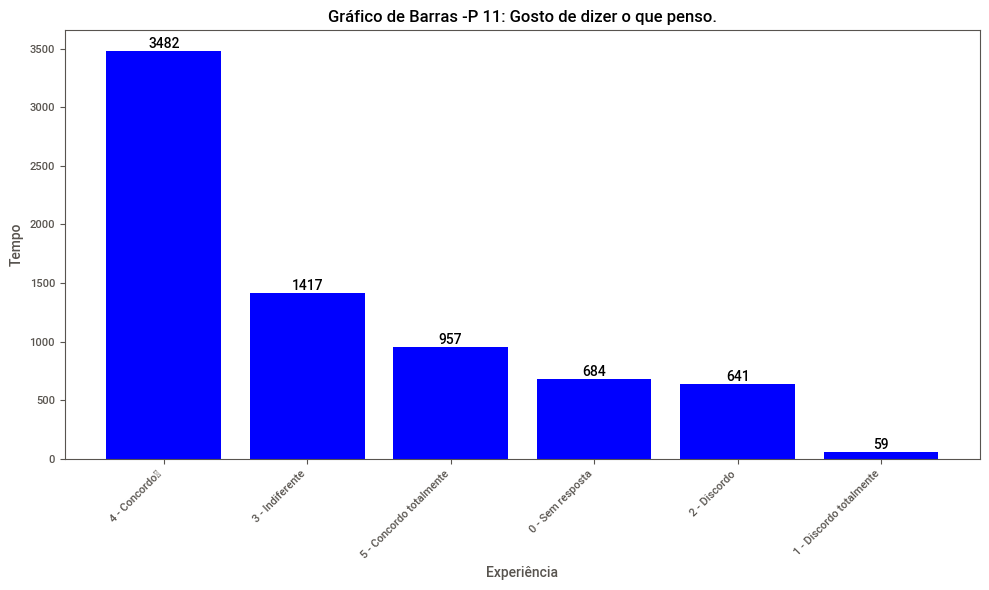

In [ ]:
# Define os dados para o gráfico de barras
labels = ['4 - Concordo	', '3 - Indiferente', '5 - Concordo totalmente', '0 - Sem resposta', '2 - Discordo', '1 - Discordo totalmente']
values = [df_p11['Frequência Absoluta'][0], df_p11['Frequência Absoluta'][1], df_p11['Frequência Absoluta'][2], df_p11['Frequência Absoluta'][3], df_p11['Frequência Absoluta'][4],
          df_p11['Frequência Absoluta'][5]]

# Cria a figura e os eixos
plt.figure(figsize=(10, 6))

# Cria o gráfico de barras
plt.bar(labels, values, color='blue')

# Adiciona título e rótulos dos eixos
plt.title('Gráfico de Barras -P 11: Gosto de dizer o que penso.')
plt.xlabel('Experiência')
plt.ylabel('Tempo')

# Rotaciona os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

# Adiciona valores acima das barras
for i, value in enumerate(values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Mostra o gráfico
plt.tight_layout()
plt.show()

In [ ]:
df_iv.get_bivariada('P 11: Gosto de dizer o que penso.')

==> "P 11: Gosto de dizer o que penso." tem IV de 0.0081


Boa_Performance,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,P 11: Gosto de dizer o que penso.,0 - Sem resposta,392,292,684,9.4475,9.5867,9.2669,57.3099,1.0345,0.0339,0.0001
1,P 11: Gosto de dizer o que penso.,1 - Discordo totalmente,39,20,59,0.8149,0.9538,0.6347,66.1017,1.5028,0.4073,0.0013
2,P 11: Gosto de dizer o que penso.,2 - Discordo,348,293,641,8.8536,8.5106,9.2986,54.2902,0.9153,-0.0885,0.0007
3,P 11: Gosto de dizer o que penso.,3 - Indiferente,836,581,1417,19.5718,20.4451,18.4386,58.9979,1.1088,0.1033,0.0021
4,P 11: Gosto de dizer o que penso.,4 - Concordo,1974,1508,3482,48.0939,48.2759,47.8578,56.6916,1.0087,0.0087,0.0000
5,P 11: Gosto de dizer o que penso.,5 - Concordo totalmente,500,457,957,13.2182,12.2279,14.5033,52.2466,0.8431,-0.1707,0.0039


### **Insights P 11: Gosto de dizer o que penso.**

**Frequências**

1. Respostas Concordantes (4 - Concordo e 5 - Concordo totalmente): Combinando as respostas "Concordo" e "Concordo totalmente", temos um total de 4449 respostas (3482 + 957). Isso representa aproximadamente 61.31% das respostas totais. Essa alta frequência sugere que a maioria dos participantes tende a expressar livremente suas opiniões e pensamentos, indicando uma preferência por ser direto e honesto em suas comunicações.
2. Respostas Neutras (3 - Indiferente): Com 1417 respostas e uma frequência relativa de 19.57%, uma parte significativa dos participantes parece estar neutra em relação à afirmação. Isso pode indicar que esses participantes não têm uma forte preferência por expressar ou não expressar seus pensamentos livremente.
3. Sem Resposta (0 - Sem resposta): Com 684 respostas e uma frequência relativa de 9.45%, há um número significativo de participantes que optaram por não responder. Isso pode indicar indecisão ou falta de clareza sobre a afirmação.
4. Respostas Discordantes (1 - Discordo e 2 - Discordo totalmente): Combinando as respostas "Discordo" e "Discordo totalmente", temos um total de 700 respostas (641 + 59). Isso representa aproximadamente 9.65% das respostas totais. Embora seja uma minoria em comparação com as respostas concordantes, ainda é uma porcentagem significativa, indicando que alguns participantes não se identificam com a afirmação e podem preferir ser mais reservados ou cautelosos ao expressar suas opiniões.

**ODDS**

* As categorias "Concordo totalmente" e "Indiferente" têm as odds mais baixas, o que indica uma menor probabilidade de concordância com a afirmação "Gosto de dizer o que penso".
* Por outro lado, as categorias "Concordo" e "Discordo totalmente" têm as odds mais altas, sugerindo uma maior probabilidade de concordância com a afirmação.

**Information Value(IV)**

* Podemos observar que as categorias com maior soma de IV são "Concordo totalmente" e "Discordo totalmente", o que indica que essas categorias são mais fortemente associadas à variável de destino.
* Por outro lado, as categorias "Indiferente" e "Sem resposta" têm somas de IV mais baixas, sugerindo uma associação mais fraca com a variável de destino.

In [ ]:
df.columns

Index(['Id_Agente', 'Boa_Performance',
       'P 01: Antes de trabalhar na empresa, você tinha experiência em Contact Center?',
       'P 02: Qual área de atendimento você atua ou atuou por mais tempo?',
       'P 03: Qual a sua escolaridade?',
       'P 04: Qual seu conhecimento em inglês?',
       'P 05: Qual o tempo gasto no trajeto da sua residência até a empresa?',
       'P 06: Você possui dependentes?',
       'P 07: É bom trabalhar com meus colegas de trabalho.',
       'P 08: Não tenho medo de criticar pessoas em cargos de liderança.',
       'P 09: Fico tenso quando estou trabalhando.',
       'P 10: Não gosto de situações que requerem que eu me comporte de forma controlada.',
       'P 11: Gosto de dizer o que penso.',
       'P 12: Gosto de fazer as coisas do meu jeito e não ligo para o que possam pensar.'],
      dtype='object')

## **P 12: Gosto de fazer as coisas do meu jeito e não ligo para o que possam pensar.**

Essa frase reflete uma atitude de independência e autoconfiança. Ao expressar o gosto por fazer as coisas à sua maneira e não se importar com a opinião dos outros, sugere-se uma personalidade forte e determinada. Isso pode indicar alguém que valoriza sua autonomia e confia em suas próprias decisões, mesmo que estas possam ser vistas de forma diferente por outras pessoas. Essa atitude pode ser vista como positiva em situações onde a originalidade e a autenticidade são valorizadas, mas também pode ser interpretada como uma falta de consideração pelas perspectivas alheias em contextos onde a colaboração e a adaptação são necessárias.

In [ ]:
#Cria um data frame da coluna "P 12: Gosto de fazer as coisas do meu jeito e não ligo para o que possam pensar."com a frequência absoluta, relativa e acumulada.
df_p12 = frequencias(df, 'P 12: Gosto de fazer as coisas do meu jeito e não ligo para o que possam pensar.')
df_p12

,P 12: Gosto de fazer as coisas do meu jeito e não ligo para o que possam pensar.,Frequência Absoluta,Frequência Relativa,Frequência Acumulada
0,2 - Discordo,3335,0.460635,0.460635
1,1 - Discordo totalmente,1456,0.201105,0.661740
2,3 - Indiferente,1134,0.156630,0.818370
3,0 - Sem resposta,684,0.094475,0.912845
4,4 - Concordo,507,0.070028,0.982873
5,5 - Concordo totalmente,124,0.017127,1.000000


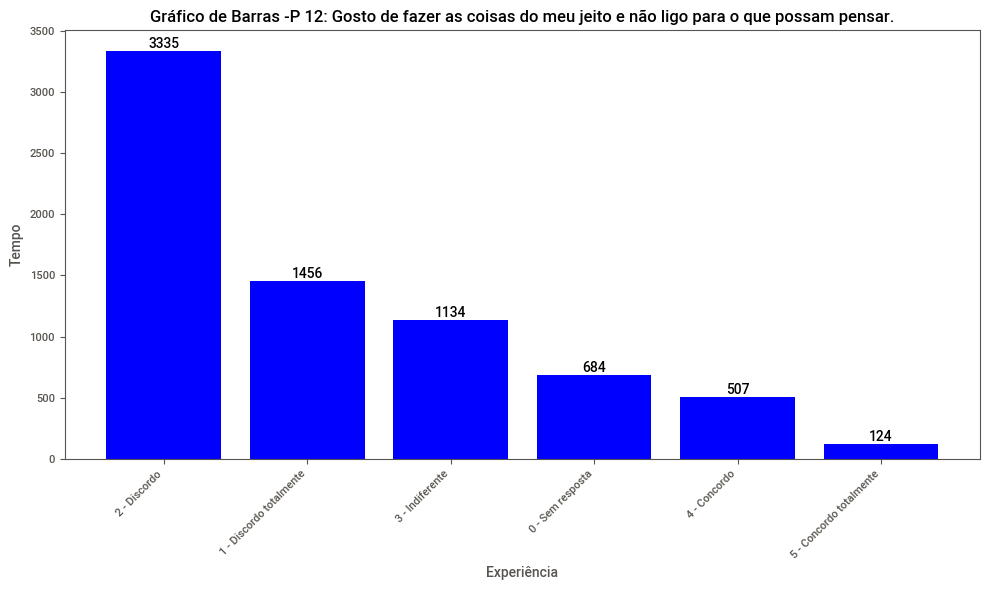

In [ ]:
# Define os dados para o gráfico de barras
labels = ['2 - Discordo', '1 - Discordo totalmente', '3 - Indiferente', '0 - Sem resposta', '4 - Concordo', '5 - Concordo totalmente']
values = [df_p12['Frequência Absoluta'][0], df_p12['Frequência Absoluta'][1], df_p12['Frequência Absoluta'][2], df_p12['Frequência Absoluta'][3], df_p12['Frequência Absoluta'][4],
          df_p12['Frequência Absoluta'][5]]

# Cria a figura e os eixos
plt.figure(figsize=(10, 6))

# Cria o gráfico de barras
plt.bar(labels, values, color='blue')

# Adiciona título e rótulos dos eixos
plt.title('Gráfico de Barras -P 12: Gosto de fazer as coisas do meu jeito e não ligo para o que possam pensar.')
plt.xlabel('Experiência')
plt.ylabel('Tempo')

# Rotaciona os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

# Adiciona valores acima das barras
for i, value in enumerate(values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Mostra o gráfico
plt.tight_layout()
plt.show()

In [ ]:
df_iv.get_bivariada('P 12: Gosto de fazer as coisas do meu jeito e não ligo para o que possam pensar.')

==> "P 12: Gosto de fazer as coisas do meu jeito e não ligo para o que possam pensar." tem IV de 0.004


Boa_Performance,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,P 12: Gosto de fazer as coisas do meu jeito e ...,0 - Sem resposta,392,292,684,9.4475,9.5867,9.2669,57.3099,1.0345,0.0339,0.0001
1,P 12: Gosto de fazer as coisas do meu jeito e ...,1 - Discordo totalmente,845,611,1456,20.1105,20.6652,19.3907,58.0357,1.0657,0.0636,0.0008
2,P 12: Gosto de fazer as coisas do meu jeito e ...,2 - Discordo,1842,1493,3335,46.0635,45.0477,47.3818,55.2324,0.9507,-0.0506,0.0012
3,P 12: Gosto de fazer as coisas do meu jeito e ...,3 - Indiferente,659,475,1134,15.6630,16.1164,15.0746,58.1129,1.0691,0.0668,0.0007
4,P 12: Gosto de fazer as coisas do meu jeito e ...,4 - Concordo,289,218,507,7.0028,7.0677,6.9184,57.0020,1.0216,0.0214,0.0000
5,P 12: Gosto de fazer as coisas do meu jeito e ...,5 - Concordo totalmente,62,62,124,1.7127,1.5163,1.9676,50.0000,0.7706,-0.2606,0.0012


### **Insights P 12: Gosto de fazer as coisas do meu jeito e não ligo para o que possam pensar.**

**Frequências**

* A maioria das pessoas (46.06%) respondeu "Discordo" da afirmação.
* Uma parcela significativa (20.11%) discordou totalmente da afirmação.
* Cerca de 15.66% das pessoas responderam que estão indiferentes em relação à afirmação.
* Houve uma proporção menor de pessoas (9.45%) que não deram resposta à afirmação.
* Aqueles que concordam com a afirmação representam uma proporção relativamente menor: 7.00% responderam "Concordo", enquanto apenas 1.71% concordaram totalmente.

Essa distribuição de respostas sugere uma polarização nas opiniões, com uma parte significativa discordando da afirmação, seguida por uma parcela menor que concorda com ela. A presença de uma proporção considerável de pessoas que não deram resposta indica uma diversidade de atitudes em relação à afirmação, desde discordância até indecisão ou falta de engajamento com o tema.

**ODDS**

* As odds mais altas estão nas categorias "Discordo totalmente" e "Indiferente", indicando uma maior probabilidade de discordância com a afirmação.
* As odds mais baixas estão nas categorias "Concordo totalmente" e "Concordo", sugerindo uma menor probabilidade de concordância com a afirmação.

**Information Value(IV)**

* A soma dos IVs indica o quanto cada categoria da variável explicativa está associada à variável de destino.
* A categoria com a soma mais alta de IV é "Discordo", seguida por "Indiferente".
* "Concordo totalmente" e "Sem resposta" têm as somas mais baixas de IV, o que sugere uma associação mais fraca com a variável de destino.

Esses insights sugerem que a maioria das pessoas tende a discordar ou sentir-se indiferente em relação à afirmação, enquanto uma parcela menor concorda com ela. A associação entre as categorias da variável explicativa e a variável de destino, indicada pela soma dos IVs e pelas odds, fornece informações valiosas sobre como as respostas estão relacionadas à atitude expressa na afirmação.

# **Desenvolvendo Modelos**


Neste exemplo utilizaremos a biblioteca Scikit Learn, uma das mais utilizadas para o desenvolvimento de modelos de Machine Learning.

### **Criação Variáveis Dummies**


A criação de variáveis dummy é um processo usado para converter variáveis categóricas em um formato numérico que pode ser usado em modelos de aprendizado de máquina. Cada categoria da variável original é representada por uma nova variável binária, onde 1 indica a presença da categoria e 0 indica a ausência. Isso permite que modelos que requerem entradas numéricas trabalhem com variáveis categóricas, facilitando a análise e previsão de dados.

In [ ]:
#criando data frame modelo com variáveis dummies
df_modelo = pd.get_dummies(df, drop_first=True, dtype=int)
df_modelo.head()

,Id_Agente,Boa_Performance,"P 01: Antes de trabalhar na empresa, você tinha experiência em Contact Center?_ Não","P 01: Antes de trabalhar na empresa, você tinha experiência em Contact Center?_ Sem resposta","P 01: Antes de trabalhar na empresa, você tinha experiência em Contact Center?_ Sim",P 02: Qual área de atendimento você atua ou atuou por mais tempo?_ Ativo de Vendas,P 02: Qual área de atendimento você atua ou atuou por mais tempo?_ Backoffice,P 02: Qual área de atendimento você atua ou atuou por mais tempo?_ Chat ou email,P 02: Qual área de atendimento você atua ou atuou por mais tempo?_ Cobrança,P 02: Qual área de atendimento você atua ou atuou por mais tempo?_ Multiskill,...,P 11: Gosto de dizer o que penso._ 1 - Discordo totalmente,P 11: Gosto de dizer o que penso._ 2 - Discordo,P 11: Gosto de dizer o que penso._ 3 - Indiferente,P 11: Gosto de dizer o que penso._ 4 - Concordo,P 11: Gosto de dizer o que penso._ 5 - Concordo totalmente,P 12: Gosto de fazer as coisas do meu jeito e não ligo para o que possam pensar._ 1 - Discordo totalmente,P 12: Gosto de fazer as coisas do meu jeito e não ligo para o que possam pensar._ 2 - Discordo,P 12: Gosto de fazer as coisas do meu jeito e não ligo para o que possam pensar._ 3 - Indiferente,P 12: Gosto de fazer as coisas do meu jeito e não ligo para o que possam pensar._ 4 - Concordo,P 12: Gosto de fazer as coisas do meu jeito e não ligo para o que possam pensar._ 5 - Concordo totalmente
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,4,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,5,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
#Target (Variável Resposta)
y = df_modelo['Boa_Performance']

#Features (Variáveis Explicativas)
x = df_modelo.drop(['Id_Agente', 'Boa_Performance'], axis =1)

In [ ]:
#verificando y "Target"
y.shape

(7240,)

In [ ]:
#Verificando x "Variáveis Explicativas"
x

,"P 01: Antes de trabalhar na empresa, você tinha experiência em Contact Center?_ Não","P 01: Antes de trabalhar na empresa, você tinha experiência em Contact Center?_ Sem resposta","P 01: Antes de trabalhar na empresa, você tinha experiência em Contact Center?_ Sim",P 02: Qual área de atendimento você atua ou atuou por mais tempo?_ Ativo de Vendas,P 02: Qual área de atendimento você atua ou atuou por mais tempo?_ Backoffice,P 02: Qual área de atendimento você atua ou atuou por mais tempo?_ Chat ou email,P 02: Qual área de atendimento você atua ou atuou por mais tempo?_ Cobrança,P 02: Qual área de atendimento você atua ou atuou por mais tempo?_ Multiskill,P 02: Qual área de atendimento você atua ou atuou por mais tempo?_ Receptivo de Vendas,P 02: Qual área de atendimento você atua ou atuou por mais tempo?_ Retenção,...,P 11: Gosto de dizer o que penso._ 1 - Discordo totalmente,P 11: Gosto de dizer o que penso._ 2 - Discordo,P 11: Gosto de dizer o que penso._ 3 - Indiferente,P 11: Gosto de dizer o que penso._ 4 - Concordo,P 11: Gosto de dizer o que penso._ 5 - Concordo totalmente,P 12: Gosto de fazer as coisas do meu jeito e não ligo para o que possam pensar._ 1 - Discordo totalmente,P 12: Gosto de fazer as coisas do meu jeito e não ligo para o que possam pensar._ 2 - Discordo,P 12: Gosto de fazer as coisas do meu jeito e não ligo para o que possam pensar._ 3 - Indiferente,P 12: Gosto de fazer as coisas do meu jeito e não ligo para o que possam pensar._ 4 - Concordo,P 12: Gosto de fazer as coisas do meu jeito e não ligo para o que possam pensar._ 5 - Concordo totalmente
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7235,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
7236,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
7237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
7238,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
cria_grafico_var_qualitativa(tabela_bivariada(df, 'Boa_Performance'))

NameError: name 'cria_grafico_var_qualitativa' is not defined

### **Divisão das bases em Treino e Teste**


A divisão das bases em treino e teste é uma prática fundamental em aprendizado de máquina e estatística para avaliar a performance de modelos preditivos. Ao dividir os dados, geralmente em uma proporção como 70-30 ou 80-20, garantimos que o modelo seja treinado em uma parte dos dados e testado em outra parte independente, simulando assim seu desempenho em dados futuros não vistos. Isso ajuda a evitar a superestimação da performance do modelo e permite uma avaliação mais realista de sua capacidade de generalização para novos dados.

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.30,
                                                    random_state=42)

### **Desenvolvimento e Treinamento do Gradient Boosting Baseline**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from math import sqrt
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Construção do modelo Tensorflow encapsulado como Scikit-Learn
def modelo_GB(min_samples_leaf=10, max_depth=3, n_estimators=50, subsample=0.5):

    # Definição da estrutura do modelo
    model = GradientBoostingClassifier(
        n_estimators=n_estimators,
        subsample=subsample,
        min_samples_leaf=min_samples_leaf,
        max_depth=max_depth,
        random_state=42
    )

    return model

In [ ]:
modelo_bl = modelo_GB()
modelo_bl.fit(x_train, y_train)

### Análise de Desempenho

In [ ]:
modelo_bl_desemp = calcula_desempenho(modelo_bl,
                                                x_train, y_train,
                                                x_test, y_test)
modelo_bl_desemp

### **Definição do espaço hiperparamétrico**

In [ ]:
# Número mínimo de amostras por folha
ehp_min_samples_leaf = np.arange(5, 26, 5)

# Máxima profundidade
ehp_max_depth = [2, 3, 4, 5]

# Número de estimadores
ehp_n_estimators = [10, 20, 50, 100, 150, 200]

# Amostragem de observações usadas para cada árvore
ehp_subsample = [0.1, 0.2, 0.3, 0.4, 0.5]

# Definição do dicionário de parâmetros
param_grid = dict(min_samples_leaf=ehp_min_samples_leaf,
                  max_depth=ehp_max_depth,
                  n_estimators=ehp_n_estimators,
                  subsample=ehp_subsample
                 )

In [ ]:
param_grid

### **Random Search**

In [ ]:
# Treinamento dos modelos usando Random Search
modelo_base = modelo_GB()
modelo_random = RandomizedSearchCV(estimator=modelo_base,
                                   param_distributions=param_grid,
                                   n_iter=50,
                                   n_jobs=5,
                                   cv=2,
                                   verbose=4,
                                   random_state=42)

modelo_random.fit(x_train, y_train)

In [ ]:
modelo_random_desemp = calcula_desempenho(modelo_random.best_estimator_,
                                                    x_train, y_train,
                                                    x_test,  y_test)
modelo_random_desemp

In [ ]:
# Obtenha as previsões do modelo
y_pred = modelo_random.predict(x_test)

# Crie a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Defina os rótulos das classes
class_labels = ['Boa Performance', 'Má Performance']

# Crie o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Adicione título e rótulos dos eixos
plt.title('Matriz de Confusão - Modelo Random Search')
plt.xlabel('Previsão')
plt.ylabel('Real')

# Mostre o gráfico
plt.show()


### **Grid Search**

In [ ]:
# Treinamento dos modelos usando Grid Search
modelo_grid = GridSearchCV(estimator=modelo_base,
                           param_grid=param_grid,
                           n_jobs=4,
                           cv=2,
                           verbose=4)

modelo_grid.fit(x_train, y_train)

In [ ]:
modelo_grid_desemp = calcula_desempenho(modelo_grid.best_estimator_,
                                                  x_train, y_train,
                                                  x_test,  y_test)
modelo_grid_desemp

In [ ]:
# Previsões do modelo
y_pred = modelo_grid.predict(x_test)

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predição")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Modelo Grid Search")
plt.show()


### **Bayesian Optimization**



In [ ]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import sys

from sklearn.metrics import recall_score

In [ ]:
param_grid

In [ ]:
bo_space = {'min_samples_leaf': hp.choice('min_samples_leaf', param_grid['min_samples_leaf']),
            'max_depth': hp.choice('max_depth', param_grid['max_depth']),
            'n_estimators': hp.choice('n_estimators', param_grid['n_estimators']),
            'subsample': hp.choice('subsample', param_grid['subsample'])
           }

In [ ]:
def bo_gb(param):

    print ('Hiperparametros testados: ', param)
    modelo_bo = modelo_GB(min_samples_leaf=param['min_samples_leaf'],
                          max_depth=param['max_depth'],
                          n_estimators=param['n_estimators'],
                          subsample=param['subsample']
                         )

    modelo_bo.fit(x_train, y_train)

    # Calcula AuROC no conjunto de Teste
    y_test_pred_proba = modelo_bo.predict_proba(x_test)[:,1]
    y_test_pred = modelo_bo.predict(x_test)
    recall_test = recall_score(y_test, y_test_pred)
    auroc_test = roc_auc_score(y_test, y_test_pred_proba)

    print(f'AuROC Teste: {auroc_test} | Recall Teste: {recall_test}')

    # sys.stdout.flush()
    return {'loss': (-recall_test), 'status': STATUS_OK}

In [ ]:
# Importando a classe Trials para rastrear o progresso da otimização
from hyperopt import Trials

# Inicializando um objeto Trials para armazenar os resultados das tentativas de otimização
trials = Trials()

# Realizando a otimização bayesiana usando a função fmin
# fn: A função objetivo a ser minimizada
# space: O espaço de busca dos hiperparâmetros
# algo: O algoritmo de otimização usado (neste caso, sugestão TPE)
# max_evals: O número máximo de avaliações a serem realizadas
# trials: O objeto Trials para rastrear o progresso da otimização
bo_search = fmin(fn=bo_gb,
                 space=bo_space,
                 algo=tpe.suggest,
                 max_evals=100,
                 trials=trials)

In [ ]:
from hyperopt import space_eval

bo_melhor_hp = space_eval(bo_space, bo_search)
print('Melhor conjunto de hiperparâmetros: ', bo_melhor_hp)

In [ ]:
modelo_bo = modelo_GB(min_samples_leaf=bo_melhor_hp['min_samples_leaf'],
                          max_depth=bo_melhor_hp['max_depth'],
                          n_estimators=bo_melhor_hp['n_estimators'],
                          subsample=bo_melhor_hp['subsample']
                     )

historico = modelo_bo.fit(x_train, y_train)

In [ ]:
modelo_bo_desemp = calcula_desempenho(modelo_bo,
                                      x_train, y_train,
                                      x_test,  y_test)
modelo_bo_desemp

In [ ]:
# Get predictions
y_pred = modelo_bo.predict(x_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define labels and group names
labels = ['Não', 'Sim']
group_names = ['Verdadeiro Negativo', 'Falso Positivo', 'Falso Negativo', 'Verdadeiro Positivo']

# Configure plot
fig, ax = plt.subplots()

# Create heatmap
sns.heatmap(cm, annot=True, fmt='g', square=False)

# Set labels and title
ax.set_xlabel('Predição', fontsize=12)
ax.set_ylabel('Verdadeiro', fontsize=12)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_title('Matriz de Confusão', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


**Verdadeiros Positivos (TP):** São os casos em que o modelo previu corretamente que a classe é 1 (positiva), e a classe real também é 1. Neste caso, o modelo previu corretamente 1228 instâncias como positivas.

**Falsos Positivos (FP):** São os casos em que o modelo previu incorretamente que a classe é 1, mas a classe real é 0. Aqui, o modelo classificou incorretamente 903 instâncias como positivas quando, na verdade, eram negativas.

**Verdadeiros Negativos (TN):** São os casos em que o modelo previu corretamente que a classe é 0 (negativa), e a classe real também é 0. Neste caso, o modelo previu corretamente 32 instâncias como negativas.

**Falsos Negativos (FN):** São os casos em que o modelo previu incorretamente que a classe é 0, mas a classe real é 1. Aqui, o modelo classificou incorretamente 9 instâncias como negativas quando, na verdade, eram positivas.

# **Interpretação**

'max_depth': 2, 'min_samples_leaf': 10, 'n_estimators': 10, 'subsample': 0.4

In [ ]:
modelo_interp = modelo_GB(max_depth=2, min_samples_leaf=10, n_estimators= 10, subsample=0.4)

modelo_interp.fit(x_train, y_train)

In [ ]:
modelo_interp_desemp = calcula_desempenho(modelo_interp,
                                                x_train, y_train,
                                                x_test, y_test)

modelo_interp_desemp

In [ ]:
# Utilizar uma amostra de até 1.000 observações para extração do conhecimento
gb_explainer = shap.TreeExplainer(model=modelo_interp,
                                  data=x_train)

gb_shap_values = gb_explainer.shap_values(X=x_train)

In [ ]:
gb_shap_values

In [ ]:
len(gb_shap_values)

In [ ]:
feat_lst = list(x.columns)


In [ ]:
import shap

## **Importância das Variáveis**

In [ ]:
# ATENÇÃO: ajustar o shap_values de acordo com a saída do modelo
shap.summary_plot(shap_values=gb_shap_values,
                  plot_type='bar',
                  feature_names=feat_lst)



In [ ]:
# ATENÇÃO: ajustar o shap_values de acordo com a saída do modelo
shap.summary_plot(shap_values=gb_shap_values,
                  features=x_train,
                  feature_names=feat_lst,
                  plot_type='dot')

## **Shapley Values**

In [ ]:
id_obs = 1

shap.plots._waterfall.waterfall_legacy(expected_value=gb_explainer.expected_value,
                                       shap_values=gb_shap_values[id_obs],
                                       feature_names=feat_lst,
                                       features=x_train.iloc[id_obs])

In [ ]:
shap.initjs()

shap.force_plot(base_value=gb_explainer.expected_value,
                shap_values=gb_shap_values[id_obs],
                feature_names=feat_lst,
                features=x_train.iloc[id_obs], link='logit')